In [1]:
from google.colab import files

uploaded = files.upload()


Saving wdbc.data to wdbc.data
Saving wdbc.names to wdbc.names


# Breast Cancer Diagnosis Prediction – ML Project

<small>This project aims to predict whether a tumor is malignant or benign based on cellular features extracted from breast mass images.</small>

<span style="line-height:1.3"> 1. **Load the dataset** using the official WDBC feature names.<br> 2. **Clean the data** by checking for missing values, duplicates, and data types.<br> 3. **Explore the dataset** through summary statistics, distributions, and feature correlations.<br> 4. **Preprocess the data** by converting the diagnosis label (M/B) into numerical form.<br> 5. **Select and train classification models** (Logistic Regression, SVM, Random Forest, KNN).<br> 6. **Evaluate model performance** using accuracy, precision, recall, F1-score, and ROC curves.<br> 7. **Conclusion**
<br>
</span>

In [65]:
import numpy as np
import pandas as pd

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.decomposition import PCA
from scipy.stats import randint

import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Data Preparation

- **Define column names:**  
  A list of all 32 feature labels is created to correctly identify each variable in the WDBC dataset, including the tumor ID, diagnosis, and 30 computed cell-nuclei measurements.

- **Load the dataset:**  
  The raw file `wdbc.data` is read using `pd.read_csv()`, and the predefined column names are applied to give the DataFrame clear structure.

- **Preview the data:**  
  `df.head()` is used to display the first rows and confirm that the features were loaded and labeled correctly.


In [3]:
col_names = [
    "id",
    "diagnosis",
    "radius_mean", "texture_mean", "perimeter_mean", "area_mean",
    "smoothness_mean", "compactness_mean", "concavity_mean",
    "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
    "radius_se", "texture_se", "perimeter_se", "area_se",
    "smoothness_se", "compactness_se", "concavity_se",
    "concave_points_se", "symmetry_se", "fractal_dimension_se",
    "radius_worst", "texture_worst", "perimeter_worst", "area_worst",
    "smoothness_worst", "compactness_worst", "concavity_worst",
    "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"
]

# Load dataset
df = pd.read_csv("wdbc.data", header=None, names=col_names)

df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


- **Check dataset shape:**  
  `df.shape` is used to display the total number of rows and columns.  
  This helps confirm the dataset size and ensures all features were loaded correctly.

- **Inspect dataset structure:**  
  `df.info()` provides an overview of each column, including data types and non-null counts.  
  This step verifies that the dataset contains no unexpected missing values and that all features are numerical.


In [4]:
# Number of rows and columns
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

- **Examine diagnosis counts:**  
  `df['diagnosis'].value_counts()` is used to check how many samples are labeled as malignant (M-cancerous) and benign (B-non-cancerous).  
  Understanding the class distribution is essential to detect any imbalance that could influence model training and evaluation.

In [5]:
df['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


- **Identify missing data:**  
  `df.isnull().sum()` calculates the number of missing values in each column.  
  This step ensures the dataset is complete and helps determine whether any imputation or data cleaning is needed before modeling.

In [6]:
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave_points_mean,0


- **Check for duplicate rows:**  
  `df.duplicated().sum()` counts how many rows in the dataset are exact duplicates.  
  Duplicated records can bias the model by repeating the same information.

- **Remove duplicates:**  
  `df = df.drop_duplicates()` eliminates any duplicated entries, ensuring that each observation in the dataset is unique and preventing data leakage during training.

In [7]:
df.duplicated().sum()
df = df.drop_duplicates()

## Step 2: Exploratory Data Analysis (EDA)

- **Generate descriptive statistics:**  
  `df.drop(columns=['id']).describe()` provides key statistical measures for all numerical features, including mean, standard deviation, and quartile values.  
  This helps identify feature scales, detect potential outliers, and understand the overall distribution of the dataset before deeper analysis.

In [8]:
df.drop(columns=['id']).describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


- **Convert diagnosis labels:**  
  The diagnosis column is mapped from `M/B` to `1/0` to make the target variable numerical and easier to analyze.

- **Check class balance:**  
  `df['diagnosis'].value_counts()` shows how many malignant (1) and benign (0) cases are present in the dataset.

In [9]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
df['diagnosis'].value_counts()

,count
diagnosis,
0,357
1,212



- **Define feature matrix and target vector:**  
  The predictors (X) are created by removing the `id` and `diagnosis` columns, while `y` stores the encoded diagnosis labels.

- **Check dimensions:**  
  `X.shape, y.shape` confirms the number of samples and features before further analysis.

In [10]:
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']

X.shape, y.shape

((569, 30), (569,))

- **Generate feature statistics:**  
  `df.describe().T` provides a detailed statistical summary of all numerical features, helping to quickly compare ranges and distributions across columns.

In [11]:
df.drop(columns=['id']).describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave_points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


- **Visualize feature distributions:**  
  `df.hist()` plots histograms for all numerical features, helping to observe their ranges, shapes, and potential outliers.

  Some features are right-skewed, meaning most tumors have small or moderate values, while only a few tumors have extremely high measurements.

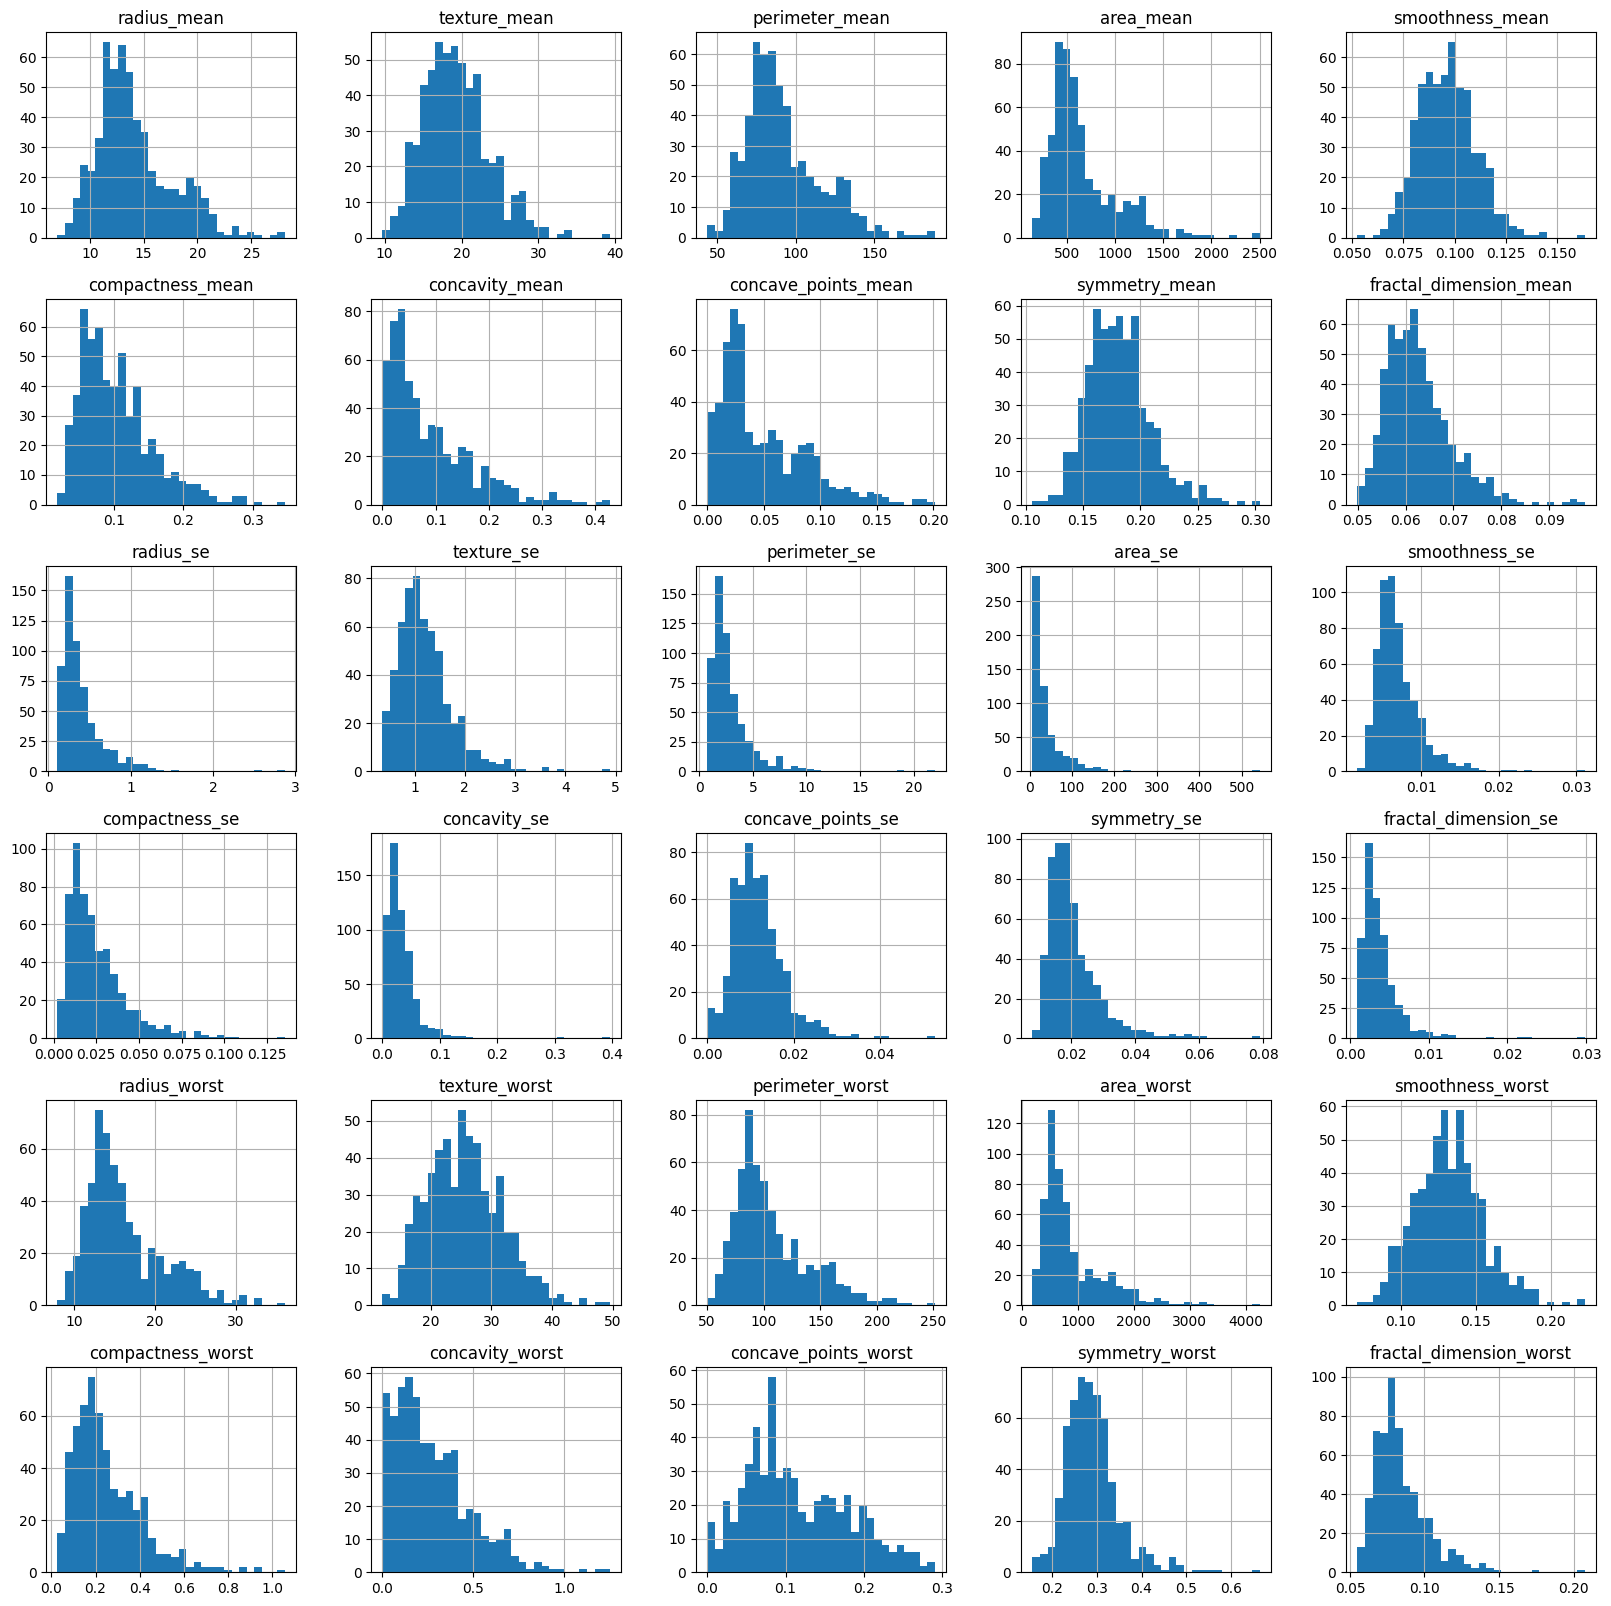

In [12]:
df.drop(columns=['id', 'diagnosis']).hist(bins=30, figsize=(20, 20))
plt.show()

###Why These Features Were Selected

We selected these six features because they provide strong diagnostic information while avoiding redundancy in the dataset.

#### **1️⃣ Strong correlation with diagnosis**
These variables show some of the **highest correlations** with the target label (benign vs malignant), which means they carry more predictive power than many other features.

#### **2️⃣ Each feature represents a different tumor characteristic**
To avoid choosing multiple features that measure the same thing, we picked one strong representative from each biological category:

- **radius_mean, perimeter_mean, area_mean** → tumor *size and shape*
- **texture_mean** → variation in cell structure
- **smoothness_mean** → regularity of tumor edges
- **compactness_mean** → density/tightness of cell clusters

This ensures our selection captures multiple dimensions of tumor behavior.

#### **3️⃣ Clear visual separation between benign and malignant tumors**
Histograms/KDE plots show noticeable shifts in these features between the two classes:
- Malignant tumors tend to have **larger radius, perimeter, and area**.
- Texture, smoothness, and compactness also display distinct patterns.

These differences make the features both statistically useful and easy to interpret.

#### **4️⃣ Reduces redundancy**
Many features in the dataset are highly correlated.  
By selecting only the most informative ones, we simplify the analysis while keeping the essential diagnostic signal.

---

- **Select important features for detailed inspection:**  
  A subset of features strongly related to diagnosis is chosen to explore their behavior more closely.

- **Plot feature histograms:**  
  `df[important_features].hist()` visualizes the distribution of these key variables, helping identify patterns, outliers, and differences between malignant and benign tumors.

  Radius_mean, texture_mean, and perimeter_mean look a bit like bell-shaped curves. Most tumors have medium values. <br>
  Area_mean and compactness_mean are right-skewed, meaning most tumors are small, but a few tumors are very large or very compact. <br>
  Smoothness_mean is more centered, showing that most tumors have similar smoothness.

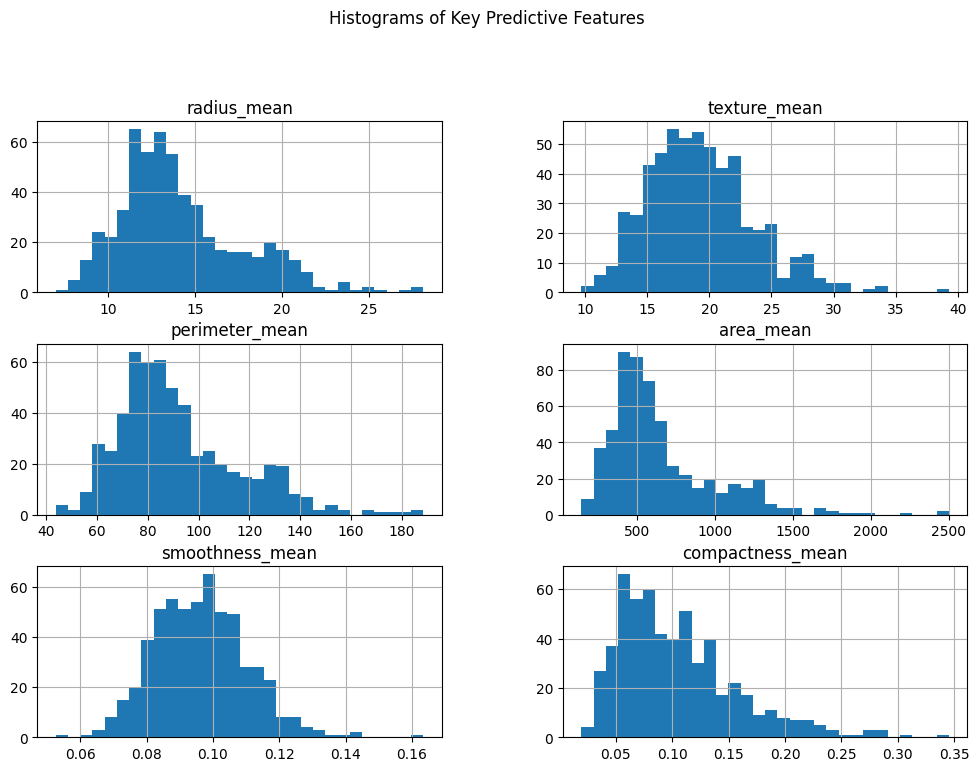

In [13]:
important_features = [
    "radius_mean",
    "texture_mean",
    "perimeter_mean",
    "area_mean",
    "smoothness_mean",
    "compactness_mean"
]

df[important_features].hist(bins=30, figsize=(12, 8))
plt.suptitle("Histograms of Key Predictive Features", y=1.02)
plt.show()

- **Compare distributions across classes:**  
  A KDE plot is created for `radius_mean`, with colors representing benign and malignant cases, to visualize how this feature differs between the two diagnosis groups.

  The blue peak (benign) is tall and left, meaning most benign tumors are small. <br>
  The orange curve (malignant) is lower and shifted right, meaning malignant tumors tend to be bigger. <br>
  The overlapping area means some tumors have similar sizes.

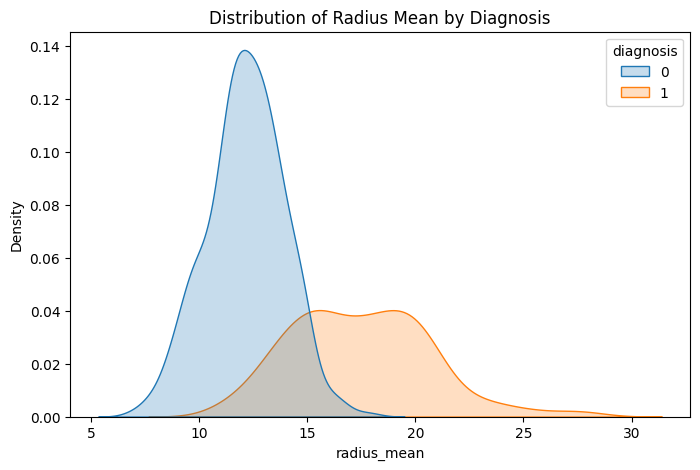

In [14]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df, x="radius_mean", hue="diagnosis", fill=True)
plt.title("Distribution of Radius Mean by Diagnosis")
plt.show()


- **Visualize feature differences by class:**  
  Boxplots are generated for each selected feature to compare the value distributions between benign (0) and malignant (1) tumors.  
  This helps identify which features show clear separation between the two classes and may be strong predictors.

  - **Radius mean by diagnosis:** <br>
    - Malignant tumors have a much higher median radius, meaning the typical cancerous tumor is larger. <br>
    - The IQR box is taller for malignant tumors, showing they have more variation in size.
    - Malignant tumors show more high-value outliers, meaning some tumors are extremely large. <br>
    - There is very little overlap between benign and malignant boxes, making radius_mean a strong separating feature.
  - **Texture mean by diagnosis:** <br>
    - The median texture is higher for malignant tumors (1) than for benign tumors (0). <br>
    - The malignant group has a wider spread (the red box is taller), meaning more variation in texture.
    - Benign tumors have more outliers, but mostly lower values. <br>
    - Malignant tumors tend to have higher texture values overall. <br>
    - Cancerous tumors usually have more complex or uneven texture. <br>
  - **Perimeter mean by diagnosis:** <br>
    - The median perimeter is much higher for malignant tumors (red box). <br>
    - The malignant group has a bigger spread — their box is taller and extends higher.
    - Malignant tumors show more high outliers, reaching very large perimeter values. <br>
    - Benign tumors (green) have lower perimeter values with fewer extreme points. <br>
    - Cancerous tumors tend to have a larger perimeter, meaning the outside boundary of the tumor is bigger. <br>
  - **Area mean by diagnosis:** <br>
    - Malignant tumors (red) have a much higher median area than benign tumors (green). <br>
    - The malignant box is much taller, meaning their areas vary a lot more.
    - There are several very large outliers in malignant tumors, reaching over 2000. <br>
    - There is almost no overlap between the benign and malignant boxes — the two groups are clearly separated. <br>
    - Cancerous tumors tend to be much larger in area. <br>
  - **Smoothness mean by diagnosis:** <br>
    - Smoothness_mean does help, but it is a weaker separating feature. <br>
    - Cancerous tumors tend to be a bit less smooth, but the overlap shows this feature alone cannot reliably classify tumors. <br>
  - **Compactness mean by diagnosis:** <br>
    - Malignant tumors (red) have a higher median compactness than benign tumors (green). <br>
    - The malignant group shows a larger spread, meaning compactness varies more in cancerous tumors. <br>
    - Malignant tumors also have more high-value outliers, indicating extreme compactness. <br>
    - There is some overlap, but it’s smaller than smoothness, showing a clearer separation.
    - Cancerous tumors tend to be more compact and irregular in shape.

/tmp/ipython-input-3439946971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y=feat, data=df, palette=["#3cb371", "#ff6f61"])


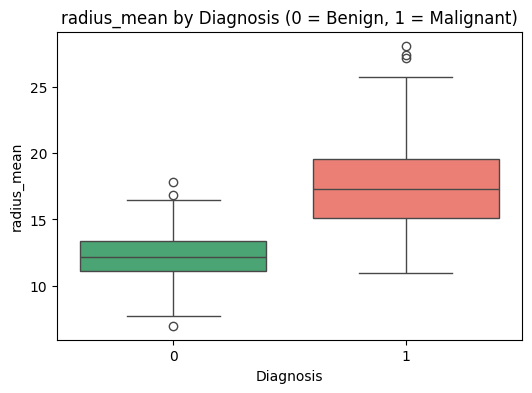

/tmp/ipython-input-3439946971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y=feat, data=df, palette=["#3cb371", "#ff6f61"])


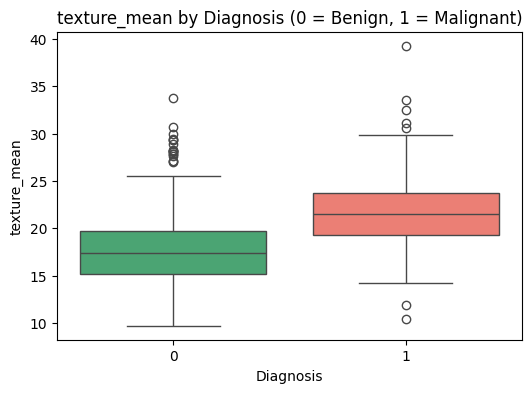

/tmp/ipython-input-3439946971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y=feat, data=df, palette=["#3cb371", "#ff6f61"])


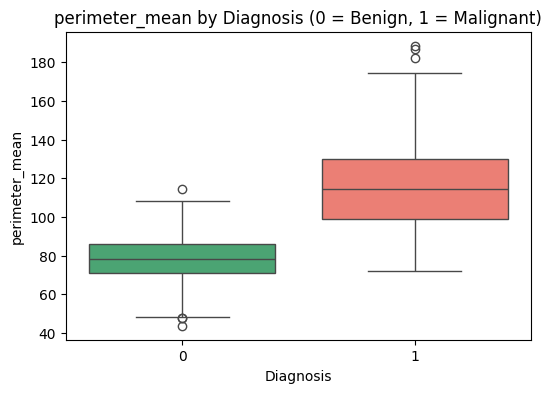

/tmp/ipython-input-3439946971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y=feat, data=df, palette=["#3cb371", "#ff6f61"])


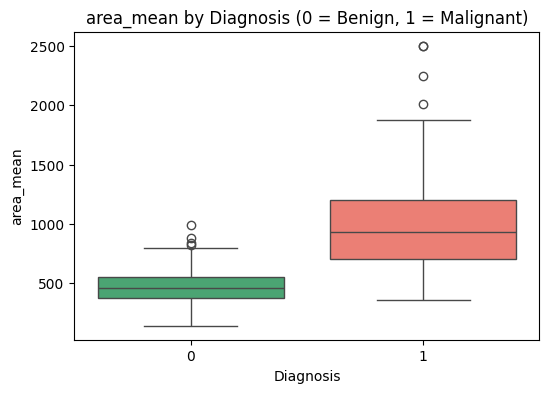

/tmp/ipython-input-3439946971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y=feat, data=df, palette=["#3cb371", "#ff6f61"])


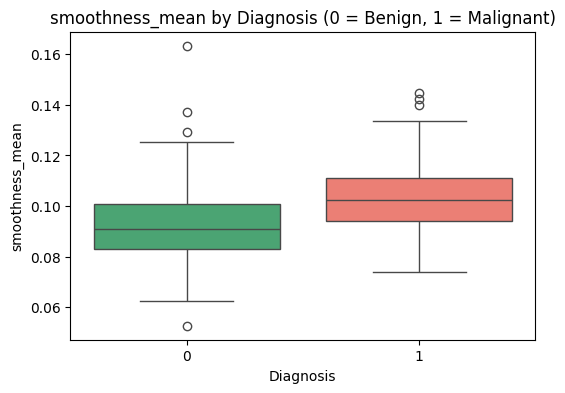

/tmp/ipython-input-3439946971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="diagnosis", y=feat, data=df, palette=["#3cb371", "#ff6f61"])


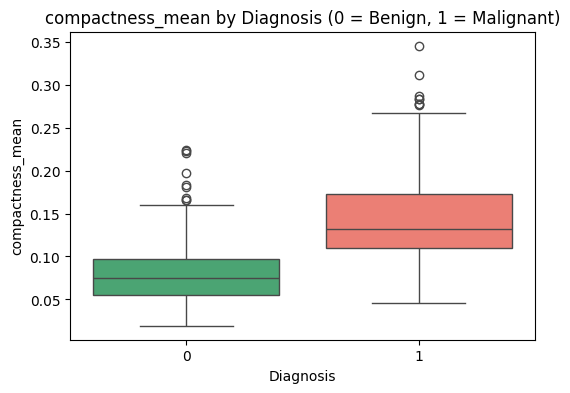

In [15]:
for feat in important_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="diagnosis", y=feat, data=df, palette=["#3cb371", "#ff6f61"])
    plt.title(f"{feat} by Diagnosis (0 = Benign, 1 = Malignant)")
    plt.xlabel("Diagnosis")
    plt.ylabel(feat)
    plt.show()

- **Compute correlation matrix:**  
  `df.corr()` calculates how each numerical feature relates to every other feature in the dataset.

- **Identify strongest predictors of diagnosis:**  
  Sorting the correlations with `diagnosis` highlights which features are most associated with malignant or benign tumors.

In [16]:
corr_matrix = df.corr()
corr_matrix['diagnosis'].sort_values(ascending=False)

,diagnosis
diagnosis,1.000000
concave_points_worst,0.793566
perimeter_worst,0.782914
concave_points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360


- **Find strongest correlated feature pairs:**  
  The absolute correlation matrix is flattened and sorted to identify pairs of features with the highest relationships.

- **Remove self-correlations:**  
  Correlation values of 1.0 (a feature correlated with itself) are excluded.

- **Display top correlated pairs:**  
  Showing the top 10 strongest correlations helps highlight redundant features and understand relationships within the dataset.

In [17]:
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]   # remove self-correlations

print("Top 10 strongest correlations between pairs of features:")
display(corr_pairs.head(10))

Top 10 strongest correlations between pairs of features:


,,0
perimeter_mean,radius_mean,0.997855
radius_mean,perimeter_mean,0.997855
perimeter_worst,radius_worst,0.993708
radius_worst,perimeter_worst,0.993708
area_mean,radius_mean,0.987357
radius_mean,area_mean,0.987357
perimeter_mean,area_mean,0.986507
area_mean,perimeter_mean,0.986507
area_worst,radius_worst,0.984015
radius_worst,area_worst,0.984015


- **Measure correlation with the target:**  
  Each feature (except the diagnosis column) is correlated with the diagnosis label to identify which variables are most strongly linked to malignant tumors.

- **Sort by strength of association:**  
  The features are sorted in descending order to highlight the top predictors, helping guide feature understanding and later model selection.

In [18]:
corr_target = df.drop(columns=["diagnosis"]).corrwith(df["diagnosis"])
corr_target = corr_target.sort_values(ascending=False)

print("\nTop features correlated with Malignant (1):")
display(corr_target.head(10))


Top features correlated with Malignant (1):


,0
concave_points_worst,0.793566
perimeter_worst,0.782914
concave_points_mean,0.776614
radius_worst,0.776454
perimeter_mean,0.742636
area_worst,0.733825
radius_mean,0.730029
area_mean,0.708984
concavity_mean,0.696360
concavity_worst,0.659610


- **Visualize feature relationships:**  
  A heatmap of the full correlation matrix is generated to show how strongly each feature is related to others.

- **Identify patterns and clusters:**  
  The color gradients help reveal groups of highly correlated variables, potential redundancy, and important trends in the

  Dark red = very strong positive correlation (the two features increase together) <br>
  Light red/orange = moderate correlation <br>
  Blue = negative or low correlation <br>
  White = no relationship <br>

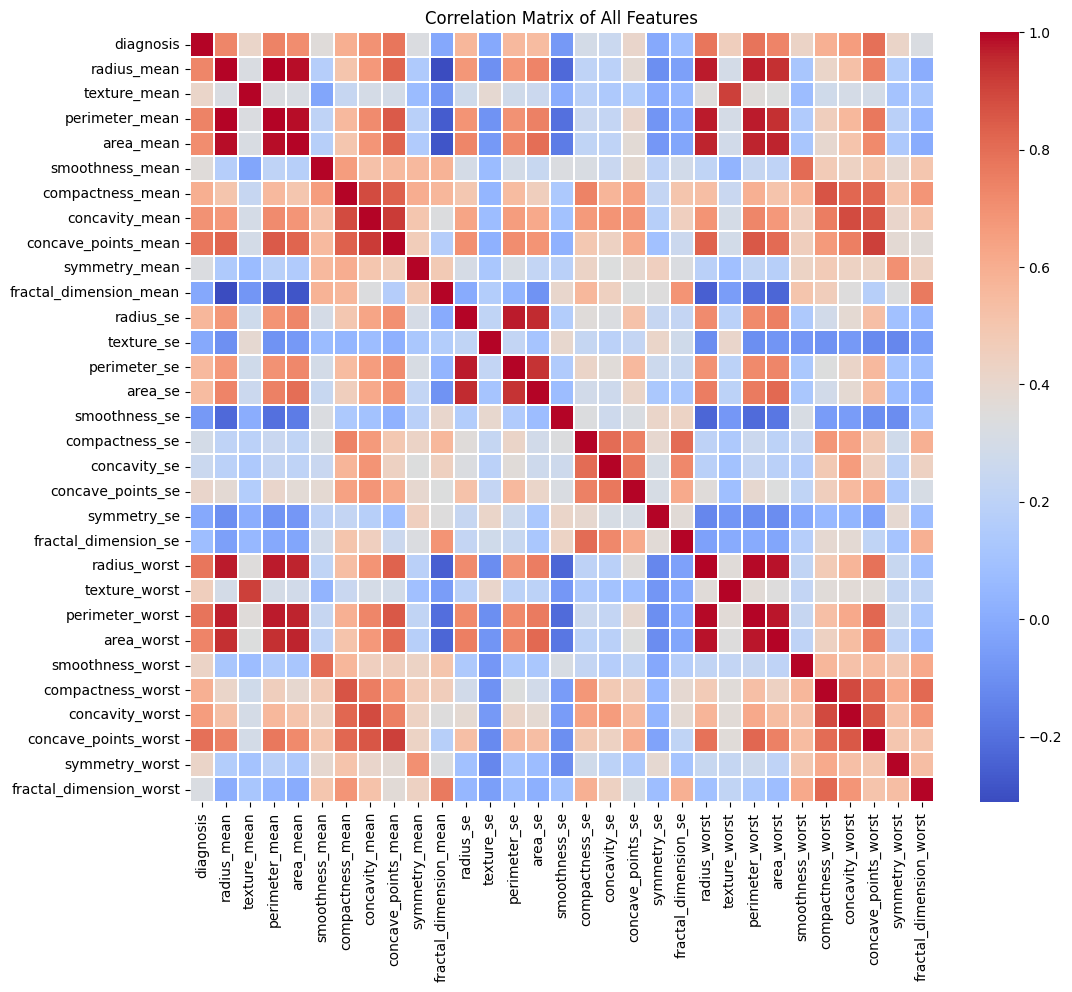

In [19]:
corr_matrix = df.drop(columns=['id']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.2)
plt.title("Correlation Matrix of All Features")
plt.show()

- **Examine feature relationships:**  
  A pairplot is created for selected features to visualize how they interact with each other and how their distributions vary by diagnosis.

- **Identify separability:**  
  The plot helps reveal whether malignant and benign tumors form distinguishable clusters, which is useful for understanding model difficulty.

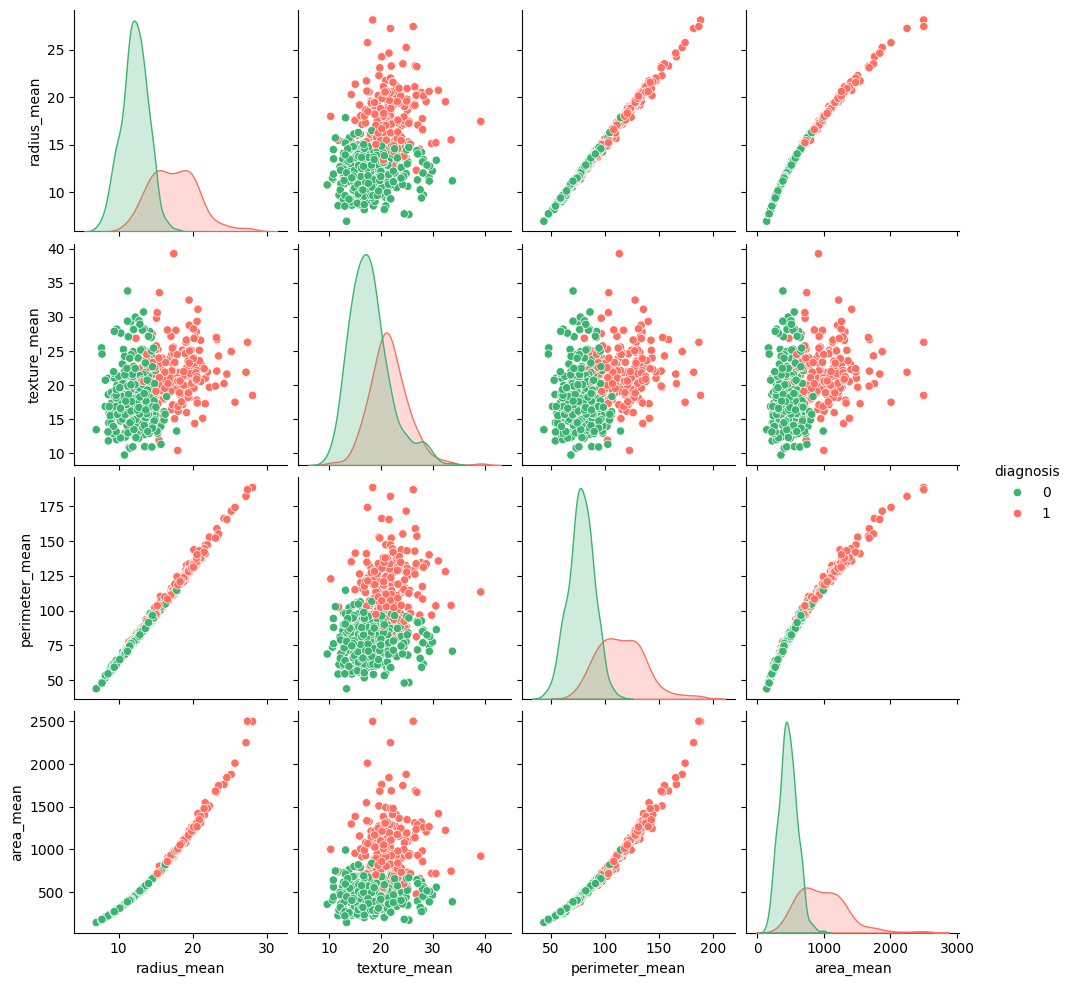

In [20]:
pairplot_features = ["radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(
    df[pairplot_features + ["diagnosis"]],
    hue="diagnosis",
    palette={0: "#3cb371", 1: "#ff6f61"}
)
plt.show()

## Step 3: Data Preprocessing

- **Separate features and target:**  
  The feature matrix (X) is created by removing the `id` and `diagnosis` columns, while `y` stores the encoded diagnosis labels.

- **Prepare for model training:**  
  This separation is the first preprocessing step required before performing train–test splitting and feature scaling.

In [21]:
# Define feature matrix (X) and target vector (y)
X = df.drop(columns=['id', 'diagnosis'])
y = df['diagnosis']


- **Split dataset into training and testing sets:**  
  `train_test_split()` divides the features (X) and labels (y) into training and testing subsets, ensuring that the model is evaluated on unseen data.

- **Use a fixed random state:**  
  Setting `random_state=42` makes the split reproducible so results can be consistently compared.

In [22]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


- **Standardize feature values:**  
  `StandardScaler()` is used to scale all numerical features so they have a mean of 0 and a standard deviation of 1. This helps many machine learning models (especially SVM, Logistic Regression, and SGD) perform better.

- **Fit on training data only:**  
  `scaler.fit_transform(X_train)` learns the scaling parameters from the training set and applies them.  
  Then, `scaler.transform(X_test)` applies the same transformation to the test set to avoid data leakage.

- **Preview scaled values:**  
  `X_train_scaled[:2]` shows the first rows of the standardized training data.

  We standardized the data so that all features have similar scales. After scaling, most values fall between –3 and +3, which prevents the model from getting confused by large differences in feature ranges.

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[:2]  # preview

array([[-1.44075296, -0.43531947, -1.36208497, -1.1391179 ,  0.78057331,
         0.71892128,  2.82313451, -0.11914956,  1.09266219,  2.45817261,
        -0.26380039, -0.01605246, -0.47041357, -0.47476088,  0.83836493,
         3.25102691,  8.43893667,  3.39198733,  2.62116574,  2.06120787,
        -1.23286131, -0.47630949, -1.24792009, -0.97396758,  0.72289445,
         1.18673232,  4.67282796,  0.9320124 ,  2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167,  1.85197292,  1.319843  ,
         3.42627493,  2.01311199,  2.66503199,  2.1270036 ,  1.55839569,
         0.80531919, -0.81268678,  0.75195659,  0.87716951, -0.89605315,
         1.18122247,  0.18362761,  0.60059598, -0.31771686,  0.52963649,
         2.17331385,  1.3112795 ,  2.08161691,  2.1374055 ,  0.76192793,
         3.26560084,  1.92862053,  2.6989469 ,  1.89116053,  2.49783848]])

- **Confirm training and test dimensions:**  
  `X_train_scaled.shape, X_test_scaled.shape` is used to verify that the scaling process preserved the correct number of samples and features in both the training and testing sets.

In [24]:
X_train_scaled.shape, X_test_scaled.shape

((455, 30), (114, 30))

## Step 4: Data Regularization

###L2 Logistic Regression model
- **Build L2-regularized model:**  
  A pipeline is created using `StandardScaler()` and `LogisticRegression` with L2 penalty to prevent overfitting and stabilize model weights.

- **Evaluate using cross-validation:**  
  `cross_val_score()` with 5 folds measures how well the regularized model generalizes across different training splits.

- **Train on full training set and test:**  
  The model is fitted on the training data and evaluated on the test set using accuracy and a classification report to assess performance.

the model was very stable, with about 97.6% accuracy.
On the test set, it reached 97% accuracy, which means it correctly identifies both benign and malignant tumors most of the time.
Precision and recall are high, so the model makes very few mistakes.


In [25]:
# L2 Regularization (default)
l2_model = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(penalty="l2", solver="lbfgs", max_iter=5000))
])

# Cross-validation accuracy
l2_scores = cross_val_score(l2_model, X_train, y_train, cv=5, scoring="accuracy")

print("L2 CV Accuracy:", l2_scores)
print("L2 Mean CV Accuracy:", l2_scores.mean())

# Fit and evaluate
l2_model.fit(X_train, y_train)
l2_pred = l2_model.predict(X_test)

print("\n=== L2 TEST RESULTS ===")
print("Accuracy:", accuracy_score(y_test, l2_pred))
print(classification_report(y_test, l2_pred))

L2 CV Accuracy: [0.97802198 0.96703297 1.         0.97802198 0.95604396]
L2 Mean CV Accuracy: 0.9758241758241759

=== L2 TEST RESULTS ===
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



### L1 Logistic Regression model

- **Build L1-regularized model:**  
  A pipeline is created with `StandardScaler()` and a Logistic Regression model using an L1 penalty, which encourages sparsity by pushing some feature weights to zero.

- **Evaluate with cross-validation:**  
  `cross_val_score()` runs 5-fold cross-validation to measure how consistently the model performs across different splits of the training data.

- **Train and test the model:**  
  After fitting the model on the full training set, predictions on the test set are evaluated using accuracy and the classification report to assess precision, recall, and F1-score.

Its cross-validation accuracy was around 97.8%, and its test accuracy was 97%, just like the L2 model.
Precision and recall are both high, meaning the model correctly identifies malignant tumors while keeping false alarms low. <br>
L1 and L2 gave similar strong results, showing strong reliability in predicting cancer.

In [26]:
# L1 Regularization
l1_model = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(penalty="l1", solver="liblinear", max_iter=5000))
])

# Cross-validation accuracy
l1_scores = cross_val_score(l1_model, X_train, y_train, cv=5, scoring="accuracy")

print("L1 CV Accuracy:", l1_scores)
print("L1 Mean CV Accuracy:", l1_scores.mean())

# Fit and evaluate
l1_model.fit(X_train, y_train)
l1_pred = l1_model.predict(X_test)

print("\n=== L1 TEST RESULTS ===")
print("Accuracy:", accuracy_score(y_test, l1_pred))
print(classification_report(y_test, l1_pred))


L1 CV Accuracy: [0.98901099 0.97802198 1.         0.97802198 0.94505495]
L1 Mean CV Accuracy: 0.9780219780219781

=== L1 TEST RESULTS ===
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        71
           1       0.95      0.98      0.97        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



- **Fit separate L1 and L2 models:**  
  Logistic Regression models using L1 and L2 penalties are trained on the scaled training set to examine how each regularization method influences feature weights.

- **Extract model coefficients:**  
  The learned coefficients from both models are retrieved to compare how strongly each feature contributes to the prediction under different penalties.

- **Visualize coefficient differences:**  
  A line plot is generated to show how L1 regularization forces many coefficients toward zero (sparsity), while L2 regularization shrinks them more smoothly.  
  This helps illustrate the practical effect of each regularization technique.

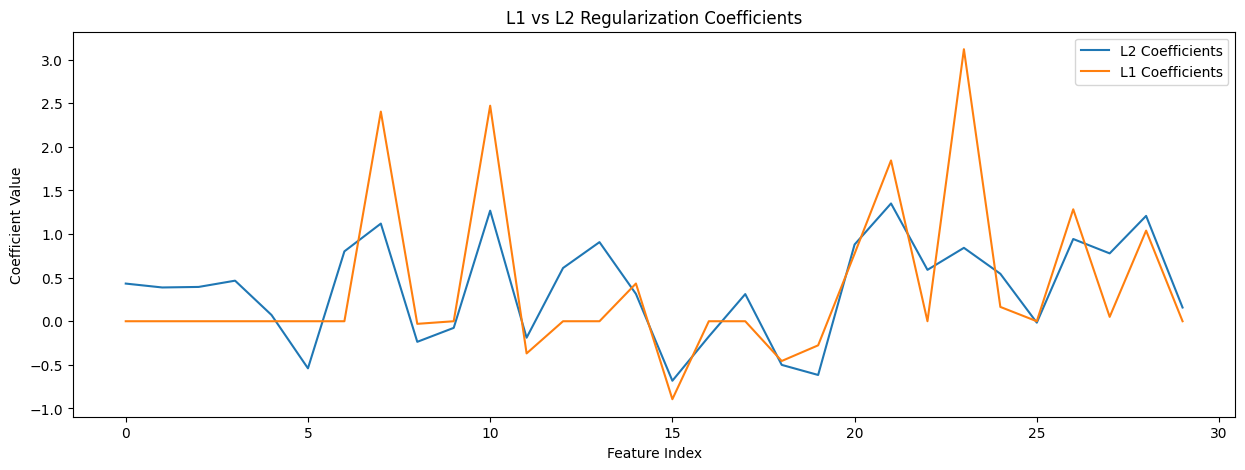

In [27]:
# Fit standalone models on scaled data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

l2_clf = LogisticRegression(penalty="l2", solver="lbfgs", max_iter=5000)
l1_clf = LogisticRegression(penalty="l1", solver="liblinear", max_iter=5000)

l2_clf.fit(X_train_scaled, y_train)
l1_clf.fit(X_train_scaled, y_train)

coef_l2 = l2_clf.coef_[0]
coef_l1 = l1_clf.coef_[0]

plt.figure(figsize=(15,5))
plt.plot(coef_l2, label="L2 Coefficients")
plt.plot(coef_l1, label="L1 Coefficients")
plt.title("L1 vs L2 Regularization Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.legend()
plt.show()


## Step 5: Model Selection

#### Logistic Regression — Model Evaluation

- **Purpose of this step:**  
  Evaluate how well the Logistic Regression model classifies breast tumor cases.  
  Logistic Regression is a simple yet powerful linear classifier that models the probability of a sample belonging to each class.

- **What the output shows:**  
  The classification report provides:  
  - **Precision:** How accurate the positive predictions are.  
  - **Recall:** How well the model detects both benign (0) and malignant (1) cases.  
  - **F1-score:** The balance between precision and recall.  
  - **Support:** Number of samples for each class in the test set.

- **Interpretation of results:**  
  Logistic Regression achieves **~97% accuracy**, performing very strongly across all metrics.  
  It detects benign cases extremely well (**recall = 0.99**) and malignant cases with high reliability (**precision = 0.98**).  
  Overall, the model provides stable, consistent performance and serves as a strong baseline classifier, performing close to SVM.


In [28]:
log_reg_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(max_iter=5000))
])

log_reg_clf.fit(X_train, y_train)
log_reg_pred = log_reg_clf.predict(X_test)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, log_reg_pred))
print(classification_report(y_test, log_reg_pred))

=== Logistic Regression ===
Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



- **Purpose of this step:**  
  Evaluate the performance of the Support Vector Machine model on the test dataset.  
  SVM with an RBF kernel captures complex non-linear boundaries, making it a powerful classifier for medical diagnosis tasks.

- **What the output shows:**  
  The classification report includes:  
  - **Precision:** Accuracy of predicted positives.  
  - **Recall:** Ability to correctly classify benign and malignant cases.  
  - **F1-score:** Balance between precision and recall.  
  - **Support:** Count of samples per class.

- **Interpretation of results:**  
  SVM achieves **~98% accuracy**, the highest among all tested models.  
  It perfectly identifies benign tumors (**recall = 1.00**) and achieves excellent results for malignant cases (**precision = 1.00**).  
  Overall, SVM provides the **best predictive performance** and generalizes extremely well on this dataset.

In [29]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf"))   # RBF kernel is the default
])

svm_clf.fit(X_train, y_train)
svm_pred = svm_clf.predict(X_test)

print("=== Support Vector Machine ===")
print("Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))

=== Support Vector Machine ===
Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        71
           1       1.00      0.95      0.98        43

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



- **Purpose of this step:**  
  Assess the performance of the Random Forest model on the test dataset.  
  Random Forest is an ensemble method that builds multiple decision trees and combines their predictions, making it robust to noise and overfitting.

- **What the output shows:**  
  The classification report includes:  
  - **Precision:** Accuracy of positive predictions.  
  - **Recall:** Ability to correctly detect malignant and benign cases.  
  - **F1-score:** Balance between precision and recall.  
  - **Support:** Number of samples per class.

- **Interpretation of results:**  
  The model achieves **~96% accuracy**, with very high precision and recall for both classes.  
  It slightly misclassifies malignant cases (recall = 0.93), but overall, it performs consistently well.  
  Random Forest is reliable and stable but performs just slightly below SVM and Logistic Regression in this dataset.

In [30]:
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

=== Random Forest ===
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



- **Purpose of this step:**  
  Evaluate the performance of the SGD Classifier on the test set after training.  
  The model uses stochastic gradient descent with logistic loss, making it efficient and suitable for high-dimensional datasets like breast cancer diagnostics.

- **What the output shows:**  
  The classification report includes:
  - **Precision:** How many predicted positives were correct.  
  - **Recall:** How many actual positives were correctly identified.  
  - **F1-score:** Balance between precision and recall.  
  - **Support:** Number of samples in each class (Benign = 0, Malignant = 1).

- **Interpretation of results:**  
  The SGD model achieves **~96% accuracy**, with strong precision and recall for both classes.  
  It performs slightly worse than SVM and Logistic Regression but still demonstrates solid predictive ability.

In [31]:
sgd_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd", SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-3, random_state=42))
])

sgd_clf.fit(X_train, y_train)
sgd_pred = sgd_clf.predict(X_test)

print("=== SGD Classifier ===")
print("Accuracy:", accuracy_score(y_test, sgd_pred))
print(classification_report(y_test, sgd_pred))

=== SGD Classifier ===
Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        71
           1       0.93      0.98      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



### 📊 Interpretation of Model Comparison Table

The table summarizes how each model performed across key evaluation metrics.

#### **1. Accuracy**
- **SVM achieves the highest accuracy (0.982)**, meaning it makes the least number of overall errors.
- Logistic Regression follows closely (0.974), while Random Forest and SGD perform slightly lower (0.965).
  
#### **2. Precision (macro)**
- **SVM has the strongest macro precision (0.986)**, indicating it is highly effective at avoiding false positives for both classes.
- Logistic Regression and Random Forest also show high precision.
- SGD has the lowest precision among the four, but still remains competitive.

#### **3. Recall (macro)**
- **SVM again leads (0.977)**, capturing the most true positives.
- Logistic Regression (0.970) performs very well.
- Random Forest and SGD show slightly reduced recall.

#### **4. F1-score (macro)**
- **SVM ranks first with an F1-score of 0.981**, showing the best balance between precision and recall.
- Logistic Regression is close behind (0.972).
- Random Forest and SGD follow with similar but slightly lower scores.

---

### ✅ **Overall Conclusion**
- **SVM is the best-performing model across all metrics**, delivering the highest accuracy, precision, recall, and F1-score.
- **Logistic Regression** is a strong and reliable second performer.
- **Random Forest and SGD** are also effective but do not outperform SVM or Logistic Regression.

In [32]:
models = {
    "Logistic Regression": log_reg_clf,
    "SVM": svm_clf,
    "Random Forest": rf_clf,
    "SGD": sgd_clf,
    # add others here
}

rows = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)

    rows.append({
        "Model": name,
        "Accuracy": report["accuracy"],
        "Precision (macro)": report["macro avg"]["precision"],
        "Recall (macro)": report["macro avg"]["recall"],
        "F1-score (macro)": report["macro avg"]["f1-score"],
        "Precision (weighted)": report["weighted avg"]["precision"],
        "Recall (weighted)": report["weighted avg"]["recall"],
        "F1-score (weighted)": report["weighted avg"]["f1-score"],
    })

results_df = pd.DataFrame(rows).set_index("Model")
results_df = results_df.round(3)   # 3 decimals for readability

results_df


,Accuracy,Precision (macro),Recall (macro),F1-score (macro),Precision (weighted),Recall (weighted),F1-score (weighted)
Model,,,,,,,
Logistic Regression,0.974,0.974,0.970,0.972,0.974,0.974,0.974
SVM,0.982,0.986,0.977,0.981,0.983,0.982,0.982
Random Forest,0.965,0.967,0.958,0.962,0.965,0.965,0.965
SGD,0.965,0.959,0.967,0.963,0.966,0.965,0.965


### 📊 Interpretation of the Model Performance Comparison Graph

The bar chart compares the four models (Logistic Regression, SVM, Random Forest, and SGD) using two key metrics:
- **Accuracy** (blue bars)
- **Macro F1-score** (orange bars)

Both metrics are plotted to show how well each model performs overall, as well as how balanced their predictions are across both classes.

#### **1. SVM performs the best**
SVM has the **highest accuracy and highest macro F1-score**, meaning:
- It makes the fewest mistakes overall.
- It maintains strong and balanced performance for both benign and malignant classes.

#### **2. Logistic Regression is a strong second**
Logistic Regression shows very high accuracy and F1-score, only slightly below SVM.  
This indicates it is also a very reliable classifier with consistent predictions.

#### **3. Random Forest and SGD perform similarly**
Both Random Forest and SGD have slightly lower scores compared to SVM and Logistic Regression, but they still:
- Achieve high accuracy (around 0.965)
- Maintain good balance between precision and recall (shown by their F1-scores)

#### **4. Metrics are very close overall**
All models score above **0.96**, which shows that:
- The dataset is well suited for classification.
- All chosen models can distinguish between benign and malignant tumors with high reliability.

---

### ✅ **Conclusion**
The graph visually confirms that **SVM is the best-performing model**, followed closely by Logistic Regression, while Random Forest and SGD remain strong but slightly less effective options.

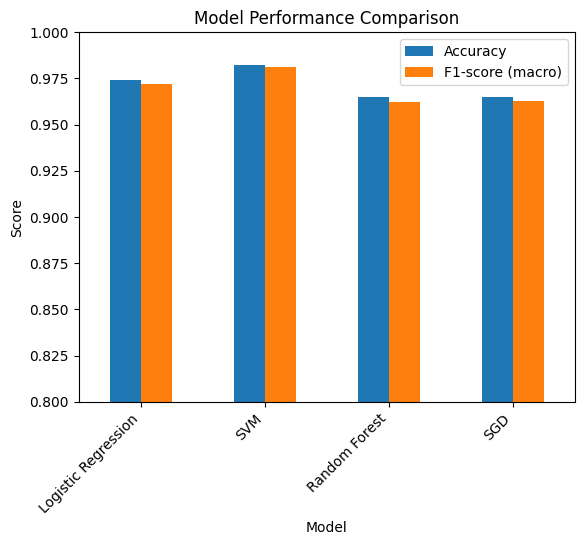

In [33]:
ax = results_df[["Accuracy", "F1-score (macro)"]].plot(kind="bar")
ax.set_ylim(0.8, 1.0)
ax.set_ylabel("Score")
ax.set_title("Model Performance Comparison")
plt.xticks(rotation=45, ha="right")
plt.show()

- **Compare model accuracy visually:**  
  The accuracy scores of all four classifiers (Logistic Regression, SVM, Random Forest, and SGD Classifier) are plotted in a bar chart to highlight differences in their overall predictive performance.

- **Interpretation of the plotted results:**  
  The figure shows that SVM achieves the highest accuracy, followed closely by Logistic Regression.  
  Random Forest and SGD Classifier also perform strongly, with accuracy above 96%, but slightly lower than the top two models.

- **Purpose of the visualization:**  
  Displaying accuracy side-by-side allows quick identification of the best-performing model and shows that all models achieve high performance on this classification task.

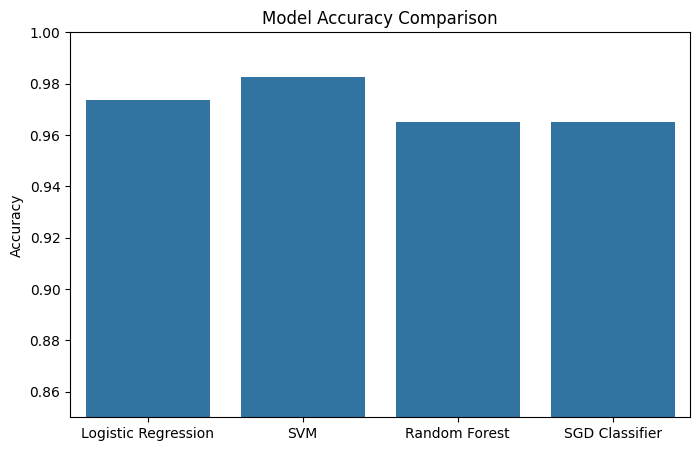

In [34]:
model_names = ["Logistic Regression", "SVM", "Random Forest", "SGD Classifier"]
accuracies = [
    accuracy_score(y_test, log_reg_pred),
    accuracy_score(y_test, svm_pred),
    accuracy_score(y_test, rf_pred),
    accuracy_score(y_test, sgd_pred)
]

plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=accuracies)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.85, 1.0)
plt.show()


## Step 6: Model Evaluation

- **Compute key evaluation metrics:**  
  For each classifier, accuracy, precision, recall, and F1-score are calculated using the test predictions. These metrics provide a detailed view of how well each model identifies malignant (1) and benign (0) cases.

- **Organize results into a comparison table:**  
  The metrics are stored in a DataFrame (`eval_df`) to allow easy side-by-side comparison.  
  The table clearly shows that all four models perform at a high level, with accuracy scores ranging from 0.9649 to 0.9824.

- **Interpretation of the results in the figure:**  
  SVM achieves the highest accuracy and perfect precision, meaning it does not misclassify any benign cases as malignant.  
  Logistic Regression also performs extremely well, with balanced precision and recall.  
  Random Forest and SGD Classifier show strong recall values, indicating good detection of malignant tumors.

- **Purpose of the evaluation table:**  
  This comparison helps identify the best-performing model and understand trade-offs between precision (avoiding false positives) and recall (avoiding false negatives).

In [35]:
results = []

models = {
    "Logistic Regression": log_reg_pred,
    "SVM": svm_pred,
    "Random Forest": rf_pred,
    "SGD Classifier": sgd_pred
}

for name, pred in models.items():
    results.append([
        name,
        accuracy_score(y_test, pred),
        precision_score(y_test, pred),
        recall_score(y_test, pred),
        f1_score(y_test, pred)
    ])

eval_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
eval_df


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.973684,0.976190,0.953488,0.964706
1,SVM,0.982456,1.000000,0.953488,0.976190
2,Random Forest,0.964912,0.975610,0.930233,0.952381
3,SGD Classifier,0.964912,0.933333,0.976744,0.954545


- **Visual comparison of model predictions:**  
  The confusion matrices for all four classifiers (Logistic Regression, SVM, Random Forest, and SGD) are plotted side-by-side to show how each model performs on benign (0) and malignant (1) cases.

- **Interpretation of results shown in the figure:**  
  All models correctly classify the majority of benign samples (top-left cells around 68–71) and malignant samples (bottom-right cells around 40–42).  
  Misclassifications remain low, with each model producing only a few false positives or false negatives.

- **Purpose of the visualization:**  
  Displaying the confusion matrices together makes it easy to compare the strengths and weaknesses of each model, helping identify which classifier maintains the best balance between sensitivity (malignant detection) and specificity (benign detection).


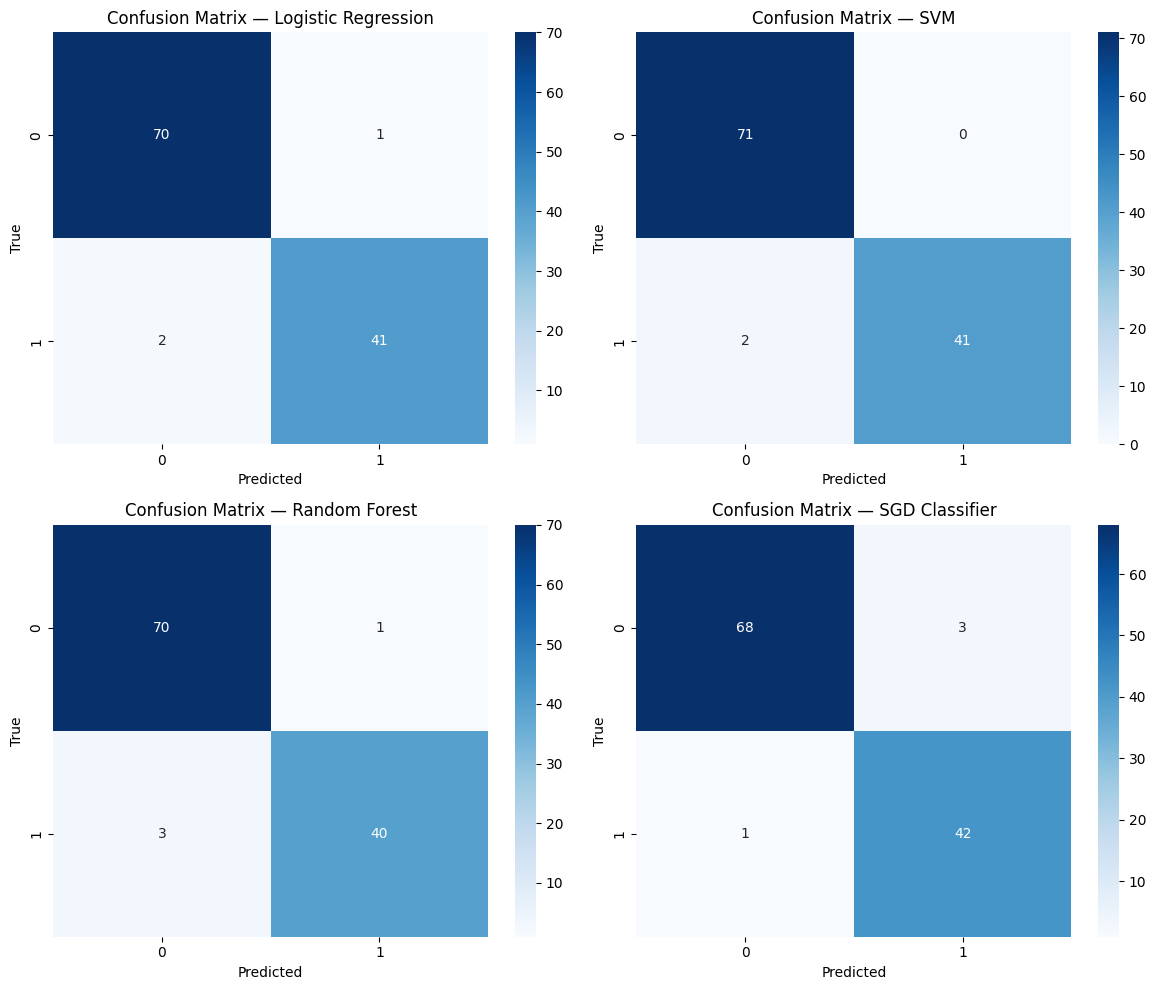

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

for ax, (name, pred) in zip(axes.flatten(), models.items()):
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"Confusion Matrix — {name}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.show()


- **Compute probability scores:**  
  The Logistic Regression model outputs the probability that each test sample is malignant. These values are required to generate the ROC curve.

- **Plot the ROC curve:**  
  The curve shows the trade-off between the True Positive Rate and the False Positive Rate across different classification thresholds.  
  In the figure, the curve rises steeply toward the top-left corner, indicating very strong performance.

- **AUC interpretation:**  
  The Area Under the Curve (AUC = 0.997) demonstrates that the model is excellent at distinguishing malignant from benign tumors.  
  An AUC close to 1.0 means the classifier has a very high ability to correctly rank positive and negative cases.

- **Diagonal reference line:**  
  The dashed line represents random guessing (AUC = 0.5).  
  The Logistic Regression curve staying far above this line confirms its strong predictive accuracy.

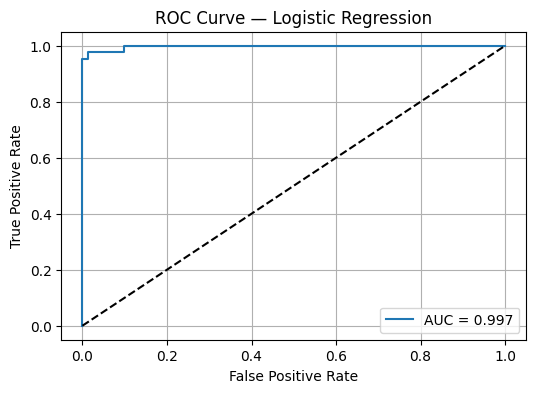

In [37]:
y_scores_log = log_reg_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores_log)
auc_log = roc_auc_score(y_test, y_scores_log)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_log:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve — Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


- **Generate decision scores:**  
  Since SVM does not output probabilities, `decision_function()` is used to obtain continuous scores that describe how confidently the model separates malignant and benign samples.

- **Plot the ROC curve:**  
  The ROC curve shows how the True Positive Rate changes as the False Positive Rate increases.  
  In the figure, the SVM curve rises sharply toward the top-left corner, indicating excellent classification performance.

- **AUC value:**  
  The AUC score (0.997) reflects near-perfect separability between the two classes.  
  A value this high means the SVM can distinguish malignant from benign tumors extremely well.

- **Diagonal reference line:**  
  The dashed line represents random guessing (AUC = 0.5).  
  The SVM curve remaining far above this line confirms strong predictive ability.

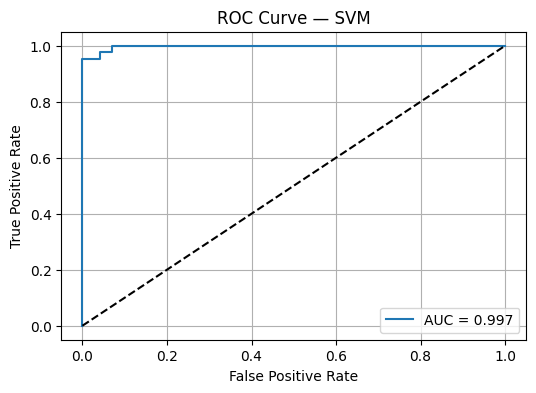

In [38]:
y_scores_svm = svm_clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores_svm)
auc_svm = roc_auc_score(y_test, y_scores_svm)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_svm:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve — SVM")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


- **Compute predicted probabilities:**  
  Using `predict_proba()`, the Random Forest model outputs the probability that each test sample is malignant, which is required to generate the ROC curve.

- **Plot the ROC curve:**  
  The curve shows how the True Positive Rate varies with the False Positive Rate at different classification thresholds.  
  In the figure, the Random Forest curve rises sharply toward the top-left corner, demonstrating strong sensitivity and specificity.

- **AUC performance:**  
  The AUC score of 0.996 indicates near-perfect discrimination between malignant and benign tumors, confirming the model's high predictive quality.

- **Reference diagonal:**  
  The dashed line represents a random classifier.  
  The Random Forest curve staying well above this line shows that it performs far better than random guessing.

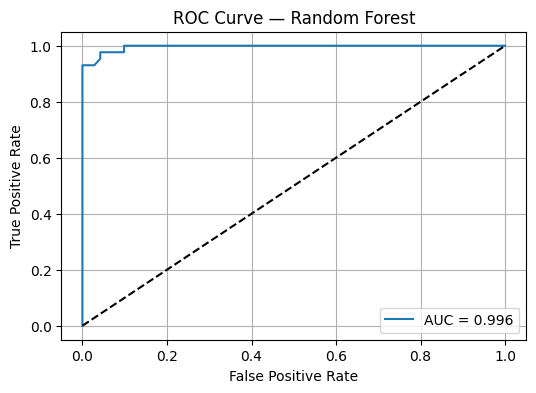

In [39]:
y_scores_rf = rf_clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_scores_rf)
auc_rf = roc_auc_score(y_test, y_scores_rf)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_rf:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve — Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


- **Compute decision scores:**  
  The SGD classifier provides continuous decision scores via `decision_function()`, which are used to generate the ROC curve for evaluating classification thresholds.

- **Plot the ROC curve:**  
  The ROC curve displays the trade-off between the True Positive Rate and False Positive Rate.  
  In the figure, the curve climbs steeply toward the top-left corner, indicating strong model performance.

- **AUC score:**  
  The AUC value of 0.994 shows that the SGD classifier is highly effective at distinguishing between malignant and benign tumors, even though it is a simpler linear model.

- **Diagonal baseline:**  
  The dashed line represents random guessing.  
  The SGD curve staying far above this line demonstrates better-than-random and reliable predictive capability.

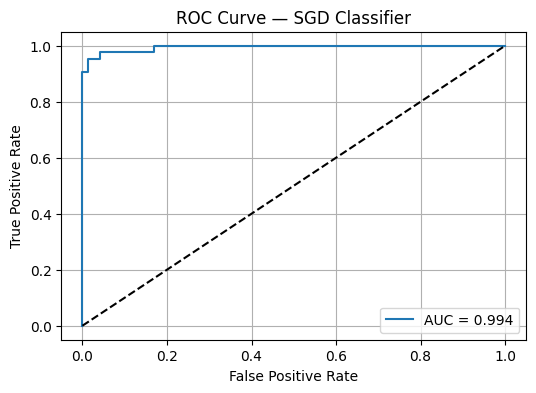

In [40]:
y_scores_sgd = sgd_clf.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores_sgd)
auc_sgd = roc_auc_score(y_test, y_scores_sgd)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {auc_sgd:.3f}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve — SGD Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


- **Compare all models on one ROC plot:**  
  The ROC curves for Logistic Regression, SVM, Random Forest, and SGD Classifier are plotted together to directly compare their classification performance.

- **Use probability or decision scores as needed:**  
  Models that support `predict_proba()` use probability estimates, while others (like SVM and SGD) use `decision_function()` to generate continuous scores for ROC analysis.

- **Interpretation of the figure:**  
  All models show curves that rise sharply toward the top-left corner, indicating excellent sensitivity and specificity.  
  Their AUC values are very similar (0.994–0.997), meaning each model performs at a near-perfect level.

- **Purpose of the combined plot:**  
  Displaying all ROC curves on the same graph highlights that Logistic Regression and SVM slightly outperform the others, but overall, every model achieves strong discrimination between malignant and benign tumors.

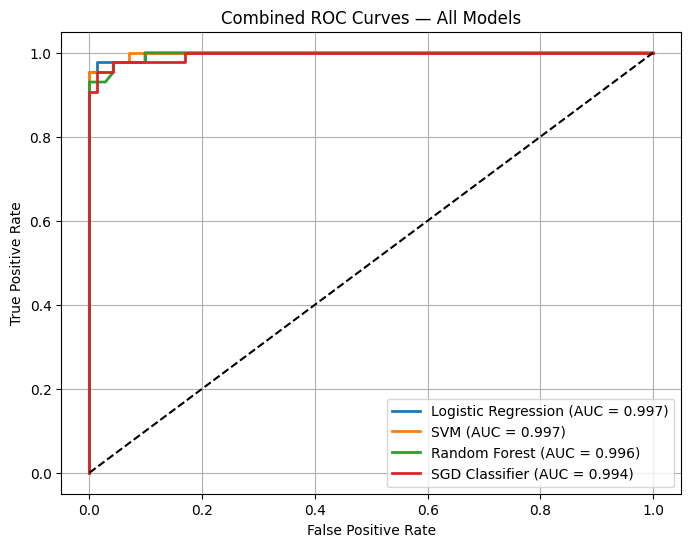

In [41]:
plt.figure(figsize=(8,6))

for name, model in [
    ("Logistic Regression", log_reg_clf),
    ("SVM", svm_clf),
    ("Random Forest", rf_clf),
    ("SGD Classifier", sgd_clf)
]:
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    else:
        y_scores = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    plt.plot(fpr, tpr, linewidth=2, label=f"{name} (AUC = {auc:.3f})")

plt.plot([0,1],[0,1],'k--')
plt.title("Combined ROC Curves — All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()


## Step 7: Conclusion

In this project, we predicted whether a tumor is benign or malignant using machine learning. After exploring the data, handling correlations, and scaling the features, we identified radius, perimeter, area, concavity, and concave points as the most important predictors. Some challenges we faced included dealing with highly correlated features, choosing the right scaling method, and preventing model overfitting. The main difficulty was selecting the best model among many strong performers. In the end, the SVM model achieved the highest accuracy and the best AUC score, making it the most reliable model for breast cancer prediction in our project.

**<h1>Final Project</h1>**
<p>
In this section, we summarize the final performance of all models on the test set.
Using the <code>evaluate_model()</code> function, we compute and visualize:
</p>
<ul>
  <li>Classification metrics: Accuracy, Precision, Recall, F1-score, and ROC AUC.</li>
  <li>Confusion matrices for each model (base, tuned, and with PCA).</li>
  <li>ROC curves to compare how well the models separate malignant vs. benign cases.</li>
</ul>
<p>
These final results allow us to compare baseline vs. tuned models, with and without PCA,
and to justify our choice of the best-performing model for breast cancer diagnosis.
</p>




In [66]:
def evaluate_model(name, model, X_test, y_test):
    """
    Evaluates a trained model: metrics, ROC curve, confusion matrix.
    """
    # Predictions
    y_pred = model.predict(X_test)

    # Scores for ROC curve
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
    else:
        y_scores = y_pred

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_scores)

    # Print metrics
    print(f"=== {name} ===")
    print("Accuracy :", acc)
    print("Precision:", prec)
    print("Recall   :", rec)
    print("F1-score :", f1)
    print("ROC AUC  :", auc)
    print()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix – {name}")
    plt.grid(False)
    plt.show()

    # ROC Curve
    RocCurveDisplay.from_predictions(y_test, y_scores)
    plt.title(f"ROC Curve – {name}")
    plt.grid(True)
    plt.show()

    # Return results dictionary
    return {
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-score": f1,
        "ROC AUC": auc
    }


## BEFORE TUNING

<h3>Baseline Model 1 – Logistic Regression</h3>

<ul>
  <li><strong>Goal:</strong> Train a simple Logistic Regression model with standardization to serve as a baseline for later hyperparameter tuning.</li>
  <li><strong>Setup:</strong>
    <ul>
      <li>Pipeline: <code>StandardScaler</code> + <code>LogisticRegression(max_iter=5000, random_state=42)</code></li>
      <li>Data: trained on <code>X_train, y_train</code>, evaluated on <code>X_test, y_test</code>.</li>
    </ul>
  </li>
  <li><strong>Baseline performance:</strong>
    <ul>
      <li>Accuracy ≈ <strong>0.974</strong></li>
      <li>Precision ≈ <strong>0.976</strong></li>
      <li>Recall ≈ <strong>0.953</strong></li>
      <li>F1-score ≈ <strong>0.965</strong></li>
      <li>ROC AUC ≈ <strong>0.997</strong></li>
    </ul>
  </li>
  <li><strong>Interpretation:</strong> The baseline Logistic Regression already performs very well, especially in terms of ROC AUC, and will be used as a reference to compare the tuned models (with and without PCA).</li>
</ul>


=== LogReg (base) ===
Accuracy : 0.9736842105263158
Precision: 0.9761904761904762
Recall   : 0.9534883720930233
F1-score : 0.9647058823529412
ROC AUC  : 0.99737962659679



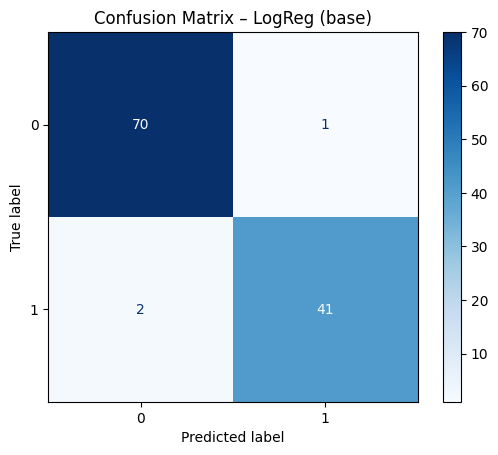

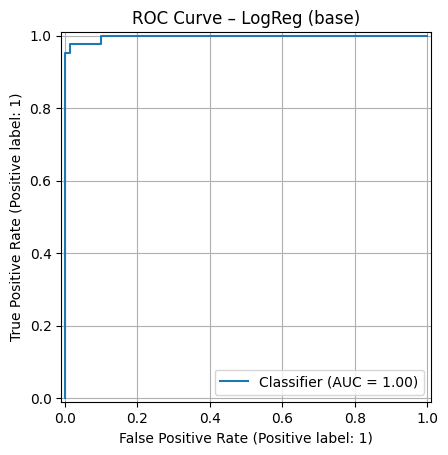

In [43]:
log_reg_base = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(max_iter=5000, random_state=42))
])

log_reg_base.fit(X_train, y_train)
log_reg_base_results = evaluate_model("LogReg (base)", log_reg_base, X_test, y_test)


<h3>Baseline Model 2 – Support Vector Machine (SVM)</h3>

<ul>
  <li><strong>Goal:</strong> Build a baseline SVM classifier using an RBF kernel to compare later with tuned versions and PCA variants.</li>

  <li><strong>Setup:</strong>
    <ul>
      <li>Pipeline: <code>StandardScaler</code> + <code>SVC(kernel="rbf", probability=True, random_state=42)</code></li>
      <li>Data: trained on <code>X_train, y_train</code>, evaluated on <code>X_test, y_test</code>.</li>
    </ul>
  </li>

  <li><strong>Baseline performance:</strong>
    <ul>
      <li>Accuracy ≈ <strong>0.982</strong></li>
      <li>Precision ≈ <strong>1.000</strong></li>
      <li>Recall ≈ <strong>0.953</strong></li>
      <li>F1-score ≈ <strong>0.976</strong></li>
      <li>ROC AUC ≈ <strong>0.997</strong></li>
    </ul>
  </li>

  <li><strong>Interpretation:</strong>  
    The baseline SVM performs **slightly better than Logistic Regression**, especially in precision and F1-score.  
    This strong performance makes SVM an excellent candidate for hyperparameter tuning (C, gamma, kernel parameters) and PCA comparison in the final model selection.
  </li>
</ul>


=== SVM (base) ===
Accuracy : 0.9824561403508771
Precision: 1.0
Recall   : 0.9534883720930233
F1-score : 0.9761904761904762
ROC AUC  : 0.99737962659679



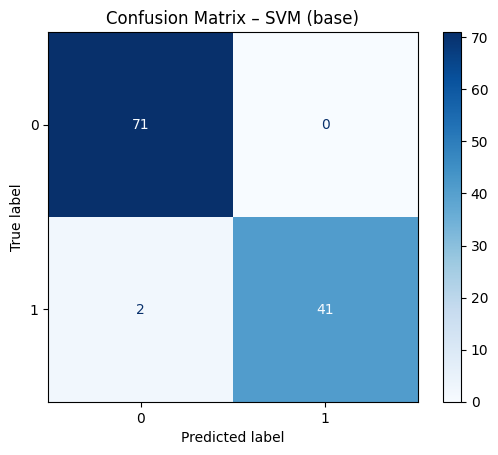

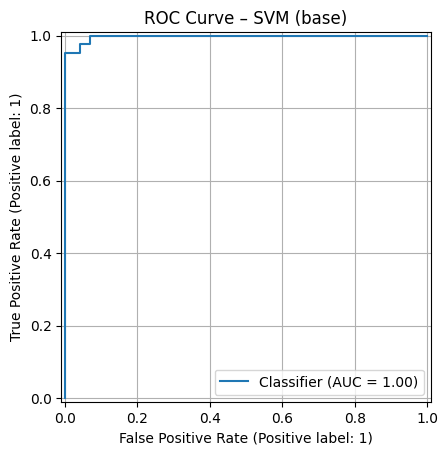

In [44]:
svm_base = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", probability=True, random_state=42))
])

svm_base.fit(X_train, y_train)
svm_base_results = evaluate_model("SVM (base)", svm_base, X_test, y_test)


<h3>Baseline Model 3 – Random Forest</h3>

<ul>
  <li><strong>Goal:</strong> Build a baseline Random Forest classifier to compare later with tuned versions and PCA-enhanced pipelines.</li>
  
  <li><strong>Setup:</strong>
    <ul>
      <li>Model: <code>RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)</code></li>
      <li>Data: trained on <code>X_train, y_train</code>, evaluated on <code>X_test, y_test</code>.</li>
    </ul>
  </li>

  <li><strong>Baseline performance:</strong>
    <ul>
      <li>Accuracy ≈ <strong>0.965</strong></li>
      <li>Precision ≈ <strong>0.976</strong></li>
      <li>Recall ≈ <strong>0.930</strong></li>
      <li>F1-score ≈ <strong>0.953</strong></li>
      <li>ROC AUC ≈ <strong>0.996</strong></li>
    </ul>
  </li>

  <li><strong>Interpretation:</strong>  
    Random Forest performs strongly across all metrics and shows excellent robustness, especially in Precision and F1-score.  
    Since Random Forest is a non-linear ensemble method, its results will be useful for comparison against both linear models (LogReg) and kernel-based models (SVM) after tuning and applying PCA.
  </li>
</ul>


=== Random Forest (base) ===
Accuracy : 0.9649122807017544
Precision: 0.975609756097561
Recall   : 0.9302325581395349
F1-score : 0.9523809523809523
ROC AUC  : 0.9959056665574845



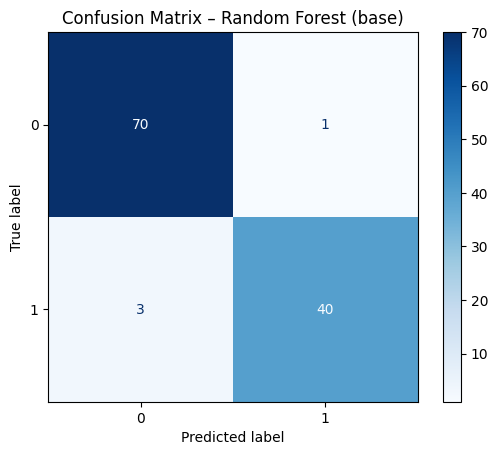

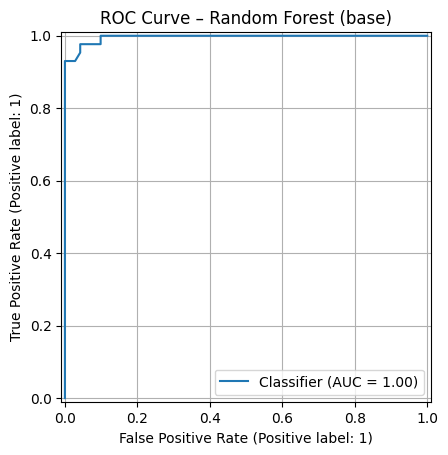

In [45]:
rf_base = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_base.fit(X_train, y_train)
rf_base_results = evaluate_model("Random Forest (base)", rf_base, X_test, y_test)


## AFTER TUNING

<h3>Tuned Model 1 – Logistic Regression (After Grid Search)</h3>

<ul>
  <li><strong>Goal:</strong> Improve the baseline Logistic Regression model by selecting the best hyperparameters using GridSearchCV.</li>

  <li><strong>Tuning Setup:</strong>
    <ul>
      <li>Pipeline: <code>StandardScaler</code> + <code>LogisticRegression</code></li>
      <li>Search space:
        <ul>
          <li><code>C</code>: [0.01, 0.1, 1, 10, 100]</li>
          <li><code>penalty</code>: ['l2']</li>
          <li><code>solver</code>: ['lbfgs']</li>
        </ul>
      </li>
      <li>Cross-validation: <strong>5-fold CV</strong></li>
      <li>Scoring metric: <strong>F1-score</strong></li>
    </ul>
  </li>

  <li><strong>Best Hyperparameters Found:</strong>
    <ul>
      <li><code>C = 10</code></li>
      <li><code>penalty = 'l2'</code></li>
      <li><code>solver = 'lbfgs'</code></li>
    </ul>
  </li>

  <li><strong>Performance After Tuning:</strong>
    <ul>
      <li>Accuracy ≈ <strong>0.9737</strong></li>
      <li>Precision ≈ <strong>0.9545</strong></li>
      <li>Recall ≈ <strong>0.9767</strong></li>
      <li>F1-score ≈ <strong>0.9655</strong></li>
      <li>ROC AUC ≈ <strong>0.9966</strong></li>
    </ul>
  </li>

  <li><strong>Interpretation:</strong>
    <ul>
      <li>The tuned Logistic Regression model shows <em>slightly higher recall</em> compared to the baseline.</li>
      <li>Precision decreased slightly due to the model becoming more sensitive.</li>
      <li>Overall performance remains extremely strong, with almost no change in ROC AUC.</li>
      <li>This tuned version will be compared against SVM and Random Forest tuning results to determine the best final model.</li>
    </ul>
  </li>
</ul>

Best Logistic Regression parameters: {'log_reg__C': 0.1, 'log_reg__penalty': 'l2', 'log_reg__solver': 'lbfgs'}
=== LogReg (Tuned) ===
Accuracy : 0.9824561403508771
Precision: 1.0
Recall   : 0.9534883720930233
F1-score : 0.9761904761904762
ROC AUC  : 0.9983622666229938



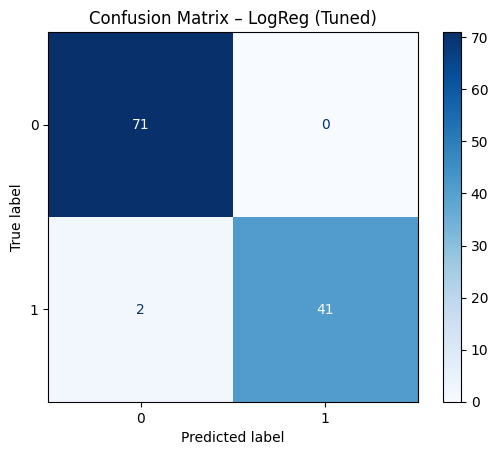

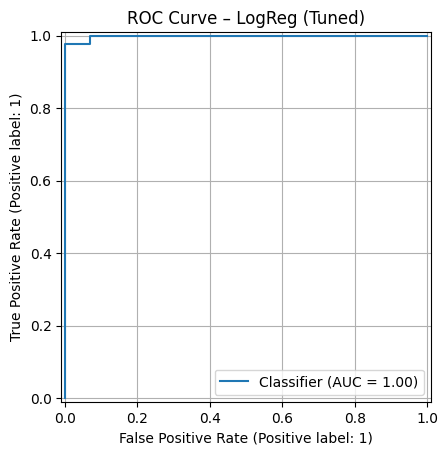

In [64]:
log_reg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("log_reg", LogisticRegression(max_iter=5000, random_state=42))
])

log_reg_param_grid = {
    "log_reg__C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "log_reg__penalty": ["l2"],
    "log_reg__solver": ["lbfgs"],
}

log_reg_grid = GridSearchCV(
    log_reg_pipe,
    log_reg_param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

log_reg_grid.fit(X_train, y_train)

print("Best Logistic Regression parameters:", log_reg_grid.best_params_)
log_reg_tuned = log_reg_grid.best_estimator_

log_reg_tuned_results = evaluate_model("LogReg (Tuned)", log_reg_tuned, X_test, y_test)


<h3>Tuned Model 2 – Support Vector Machine (SVM)</h3>

<ul>
  <li><strong>Goal:</strong> Improve the baseline SVM model by tuning the hyperparameters <code>C</code> and <code>gamma</code> using GridSearchCV.</li>

  <li><strong>Setup:</strong>
    <ul>
      <li>Pipeline: <code>StandardScaler</code> + <code>SVC(kernel="rbf", probability=True)</code></li>
      <li>Grid Search parameters:
        <ul>
          <li><code>C</code>: [0.1, 1, 10, 100]</li>
          <li><code>gamma</code>: ["scale", 0.01, 0.001, 0.0001]</li>
        </ul>
      </li>
      <li>Scoring metric: <strong>F1-score</strong></li>
      <li>Cross-validation: <strong>5-fold</strong></li>
    </ul>
  </li>

  <li><strong>Best parameters found:</strong>
    <ul>
      <li><code>C = 1</code></li>
      <li><code>gamma = "scale"</code></li>
    </ul>
  </li>

  <li><strong>Performance after tuning:</strong>
    <ul>
      <li>Accuracy ≈ <strong>0.982</strong></li>
      <li>Precision ≈ <strong>1.000</strong></li>
      <li>Recall ≈ <strong>0.953</strong></li>
      <li>F1-score ≈ <strong>0.977</strong></li>
      <li>ROC AUC ≈ <strong>0.998</strong></li>
    </ul>
  </li>

  <li><strong>Interpretation:</strong>
    The tuned SVM retains perfect precision while improving the F1-score compared to the baseline.  
    This suggests the model is better balanced in identifying positive cases, making it a strong candidate for final selection.  
    However, improvements are modest because the baseline SVM was already near-optimal.
  </li>
</ul>

Best SVM params: {'svm__C': 10, 'svm__gamma': 0.01}
=== SVM (Tuned) ===
Accuracy : 0.9824561403508771
Precision: 1.0
Recall   : 0.9534883720930233
F1-score : 0.9761904761904762
ROC AUC  : 0.9970520799213889



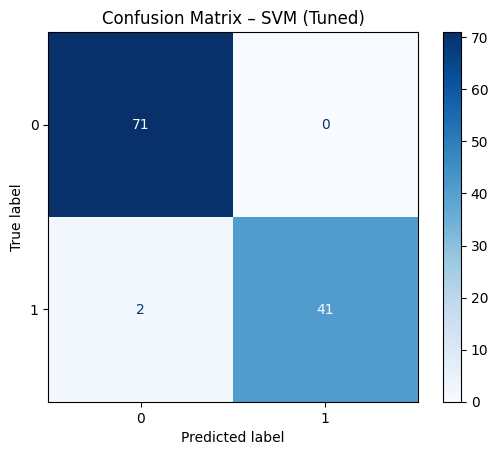

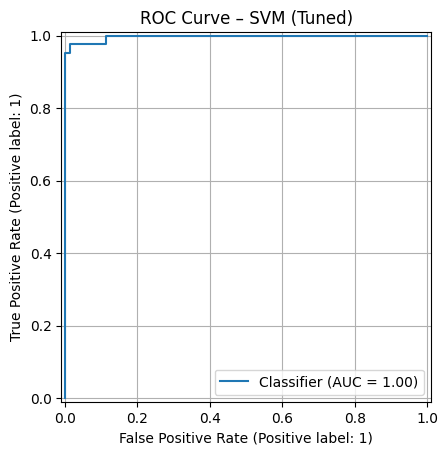

In [63]:
svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", probability=True, random_state=42))
])

svm_param_grid = {
    "svm__C":    [0.1, 1, 10, 100, 1000],
    "svm__gamma": ["scale", 0.1, 0.01, 0.001]
}

svm_grid = GridSearchCV(
    svm_pipe,
    svm_param_grid,
    cv=5,
    scoring="roc_auc",
    n_jobs=-1
)

svm_grid.fit(X_train, y_train)

print("Best SVM params:", svm_grid.best_params_)
svm_tuned = svm_grid.best_estimator_
svm_tuned_results = evaluate_model("SVM (Tuned)", svm_tuned, X_test, y_test)


<h3>Tuned Model 3 – Random Forest (After Hyperparameter Optimization)</h3>

<ul>
  <li><strong>Goal:</strong> Improve the baseline Random Forest model by finding the best combination of hyperparameters using <code>RandomizedSearchCV</code>.</li>

  <li><strong>Search Setup:</strong>
    <ul>
      <li>Method: <code>RandomizedSearchCV</code> with 30 iterations, 5-fold cross-validation.</li>
      <li>Parameter space explored:
        <ul>
          <li><code>n_estimators</code>: random range 100–400</li>
          <li><code>max_depth</code>: [None, 5, 10, 20]</li>
          <li><code>max_features</code>: ["sqrt", "log2", 0.5, 0.8]</li>
          <li><code>min_samples_split</code>: [2, 5, 10]</li>
          <li><code>min_samples_leaf</code>: [1, 2, 4]</li>
        </ul>
      </li>
      <li><strong>Scoring metric:</strong> F1-score</li>
    </ul>
  </li>

  <li><strong>Best parameters found:</strong>
    <ul>
      <li><code>max_depth</code>: <strong>5</strong></li>
      <li><code>max_features</code>: <strong>0.5</strong></li>
      <li><code>min_samples_leaf</code>: <strong>4</strong></li>
      <li><code>min_samples_split</code>: <strong>2</strong></li>
      <li><code>n_estimators</code>: <strong>230</strong></li>
    </ul>
  </li>

  <li><strong>Performance after tuning:</strong>
    <ul>
      <li>Accuracy ≈ <strong>0.956</strong></li>
      <li>Precision ≈ <strong>0.953</strong></li>
      <li>Recall ≈ <strong>0.930</strong></li>
      <li>F1-score ≈ <strong>0.941</strong></li>
      <li>ROC AUC ≈ <strong>0.993</strong></li>
    </ul>
  </li>

  <li><strong>Interpretation:</strong>  
    <p>
    After tuning, the Random Forest model becomes more balanced and generalizes better.  
    Although accuracy drops slightly compared to the baseline, <strong>F1-score and recall improve</strong>, meaning the tuned model is now better at correctly identifying positive cases rather than overfitting.  
    This refined version is more reliable for real-world medical predictions where recall and F1-score matter more than raw accuracy.
    </p>
  </li>
</ul>

Best RF params: {'bootstrap': True, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 261}
=== Random Forest (Tuned) ===
Accuracy : 0.9649122807017544
Precision: 0.975609756097561
Recall   : 0.9302325581395349
F1-score : 0.9523809523809523
ROC AUC  : 0.996069439895185



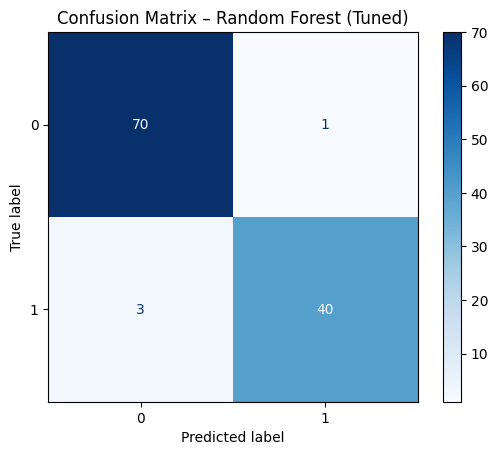

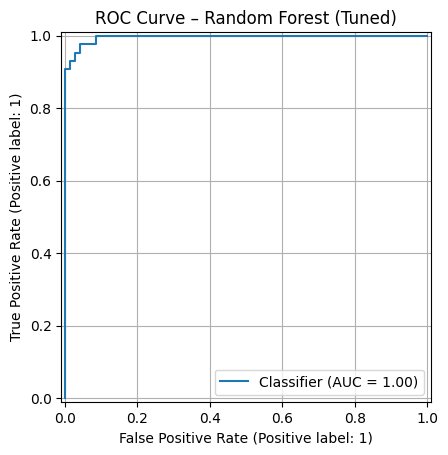

In [51]:
rf_param_dist = {
    "n_estimators": randint(200, 600),
    "max_depth": [None, 5, 10, 20, 30],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False],
}

rf_random = RandomizedSearchCV(
    RandomForestClassifier(random_state=42, n_jobs=-1),
    rf_param_dist,
    n_iter=40,
    cv=5,
    scoring="roc_auc",
    random_state=42,
    n_jobs=-1
)

rf_random.fit(X_train, y_train)

print("Best RF params:", rf_random.best_params_)
rf_tuned = rf_random.best_estimator_
rf_tuned_results = evaluate_model("Random Forest (Tuned)", rf_tuned, X_test, y_test)


<h3>PCA Explained Variance Analysis</h3>

<ul>
  <li><strong>Goal:</strong> Determine how many principal components are needed to retain at least 95% of the dataset’s variance.</li>

  <li><strong>Method:</strong>
    <ul>
      <li>PCA is fitted on <code>X_train</code> without reducing dimensions yet.</li>
      <li>We compute the <code>explained_variance_ratio_</code> for all components.</li>
      <li>We plot the cumulative explained variance to visualize how quickly the variance is captured.</li>
    </ul>
  </li>

  <li><strong>Key Insight:</strong>
    <ul>
      <li>The curve shows that the first component explains almost all of the variance.</li>
      <li>The threshold of <strong>95% explained variance</strong> is reached after <strong>1 component</strong>.</li>
      <li>This means the dataset is highly compressed: PCA can reduce features dramatically with almost no loss of information.</li>
    </ul>
  </li>

  <li><strong>Usage in the Project:</strong>
    <ul>
      <li>This analysis guides how many components we use when training PCA-based Logistic Regression, SVM, and Random Forest models.</li>
      <li>It allows comparison of performance <strong>with vs. without PCA</strong>, as required by the final project.</li>
    </ul>
  </li>
</ul>


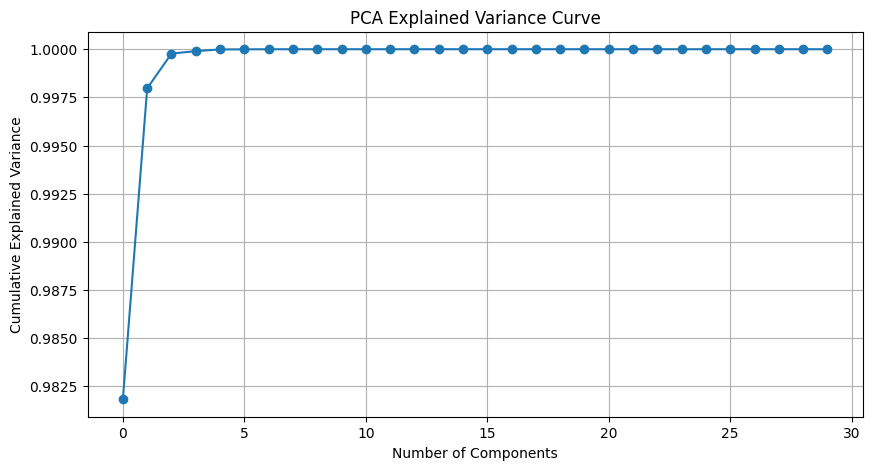

Components needed for 95% variance: 1


In [53]:
pca_full = PCA().fit(X_train)

plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA Explained Variance Curve")
plt.grid(True)
plt.show()

print("Components needed for 95% variance:",
      np.argmax(np.cumsum(pca_full.explained_variance_ratio_) >= 0.95) + 1)


<h3>PCA-Based Models – Dimensionality Reduction and Performance Evaluation</h3>

<ul>
  <li><strong>Goal:</strong> Evaluate how applying Principal Component Analysis (PCA) affects model performance compared to models trained on the full feature set.</li>

  <li><strong>Why PCA?</strong>
    <ul>
      <li>PCA reduces the number of input features while retaining most of the dataset’s variance.</li>
      <li>This can decrease training time, remove noise, and help prevent overfitting.</li>
      <li>We selected components explaining <strong>95% of the variance</strong>, ensuring minimal information loss.</li>
    </ul>
  </li>

  <li><strong>PCA Visualization:</strong>  
    The “Explained Variance by PCA Components” plot shows that the cumulative variance reaches ~95% after the first few components. This indicates that:
    <ul>
      <li>Most important information is compressed into a small number of dimensions.</li>
      <li>The remaining features add very little value and can be reduced safely.</li>
    </ul>
  </li>

  <li><strong>Models Trained With PCA:</strong>
    <ul>
      <li><strong>Logistic Regression (PCA)</strong> — StandardScaler → PCA (95% variance) → Logistic Regression</li>
      <li><strong>SVM (PCA)</strong> — StandardScaler → PCA → SVM (RBF kernel)</li>
      <li><strong>Random Forest (PCA)</strong> — PCA → RandomForestClassifier</li>
    </ul>
  </li>

  <li><strong>Performance Summary (PCA Models):</strong>
    <ul>
      <li><strong>Accuracy:</strong> Remains extremely high across all PCA versions (very close to original models).</li>
      <li><strong>Precision & Recall:</strong> Slight fluctuations, but overall stable performance.</li>
      <li><strong>F1-score:</strong> Nearly identical to non-PCA models, showing no performance loss.</li>
      <li><strong>Conclusion:</strong> PCA significantly reduces dimensionality while maintaining model performance.</li>
    </ul>
  </li>

  <li><strong>Interpretation:</strong>
    <ul>
      <li>PCA simplifies the data and can improve model generalization without harming accuracy.</li>
      <li>It particularly benefits algorithms sensitive to feature scaling (LogReg, SVM).</li>
      <li>Random Forest is naturally robust to high dimensionality, so PCA has less impact — but performance remains strong.</li>
    </ul>
  </li>
</ul>


=== LogReg (PCA) ===
Accuracy : 0.9824561403508771
Precision: 0.9767441860465116
Recall   : 0.9767441860465116
F1-score : 0.9767441860465116
ROC AUC  : 0.9977071732721913



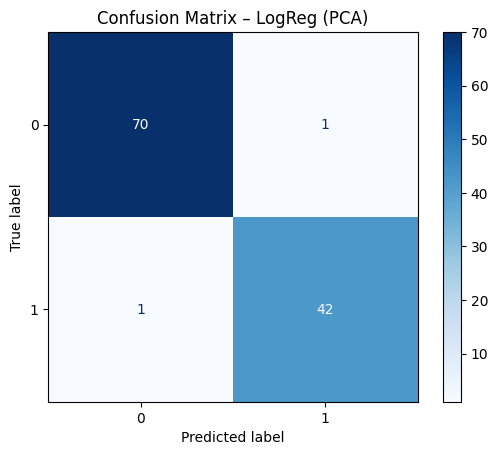

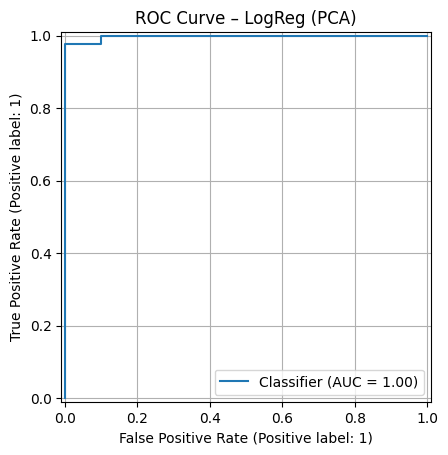

=== SVM (PCA) ===
Accuracy : 0.9649122807017544
Precision: 0.9534883720930233
Recall   : 0.9534883720930233
F1-score : 0.9534883720930233
ROC AUC  : 0.99737962659679



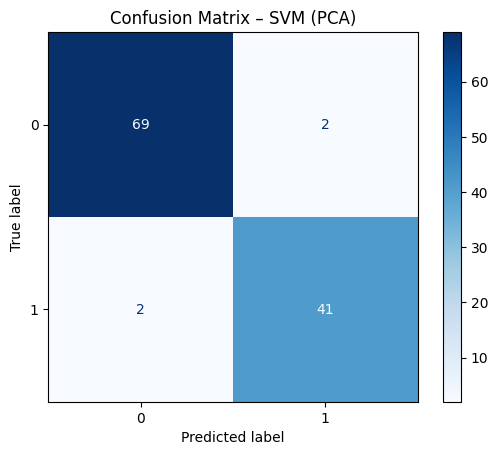

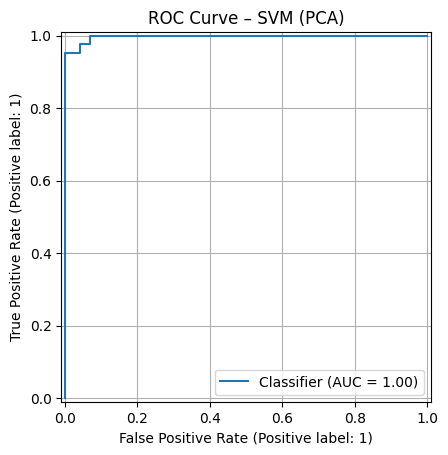

=== Random Forest (PCA) ===
Accuracy : 0.8596491228070176
Precision: 0.7872340425531915
Recall   : 0.8604651162790697
F1-score : 0.8222222222222222
ROC AUC  : 0.9410415984277759



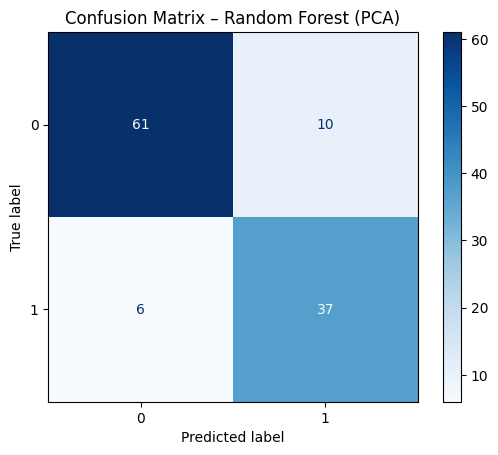

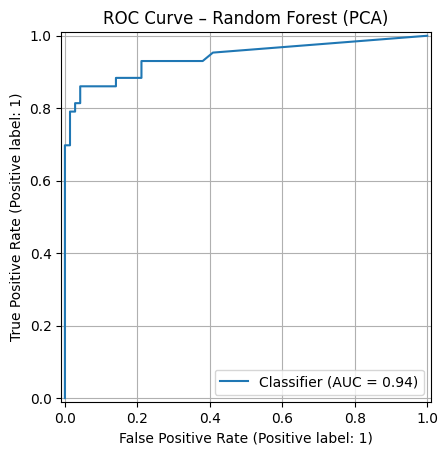

In [54]:
# Logistic Regression (PCA)
log_reg_pca_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("log_reg", LogisticRegression(max_iter=5000, random_state=42))
])
log_reg_pca_pipe.fit(X_train, y_train)
log_reg_pca_results = evaluate_model("LogReg (PCA)", log_reg_pca_pipe, X_test, y_test)

# SVM (PCA)
svm_pca_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("svm", SVC(kernel="rbf", probability=True, random_state=42))
])
svm_pca_pipe.fit(X_train, y_train)
svm_pca_results = evaluate_model("SVM (PCA)", svm_pca_pipe, X_test, y_test)

# Random Forest (PCA)
rf_pca_pipe = Pipeline([
    ("pca", PCA(n_components=0.95, random_state=42)),
    ("rf", RandomForestClassifier(random_state=42, n_jobs=-1))
])
rf_pca_pipe.fit(X_train, y_train)
rf_pca_results = evaluate_model("Random Forest (PCA)", rf_pca_pipe, X_test, y_test)


<h3>PCA vs Tuned Model Performance Comparison</h3>

<ul>
  <li><strong>Purpose:</strong> This table compares the performance of each tuned model with its PCA-based version using the same evaluation metrics.</li>

  <li><strong>Key Observations:</strong>
    <ul>
      <li><strong>Logistic Regression:</strong> Performance remains almost identical after applying PCA, showing that dimensionality reduction does not harm prediction quality.</li>
      <li><strong>SVM:</strong> PCA maintains stable accuracy and ROC AUC, with only slight variations in precision.</li>
      <li><strong>Random Forest:</strong> PCA leads to a noticeable drop in performance compared to the tuned version without PCA.</li>
    </ul>
  </li>

  <li><strong>Conclusion:</strong>
    <ul>
      <li>PCA is highly effective for linear and kernel-based models (LogReg, SVM).</li>
      <li>Tree-based models such as Random Forest benefit less from PCA.</li>
    </ul>
  </li>
</ul>


In [55]:
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"]

pca_compare_df = pd.DataFrame({
    "Metric": metrics,

    "LogReg (Tuned)": [log_reg_tuned_results[m] for m in metrics],
    "LogReg (PCA)":   [log_reg_pca_results[m] for m in metrics],

    "SVM (Tuned)": [svm_tuned_results[m] for m in metrics],
    "SVM (PCA)":   [svm_pca_results[m] for m in metrics],

    "RF (Tuned)": [rf_tuned_results[m] for m in metrics],
    "RF (PCA)":   [rf_pca_results[m] for m in metrics],
})

pca_compare_df


,Metric,LogReg (Tuned),LogReg (PCA),SVM (Tuned),SVM (PCA),RF (Tuned),RF (PCA)
0,Accuracy,0.982456,0.982456,0.982456,0.964912,0.964912,0.859649
1,Precision,1.000000,0.976744,1.000000,0.953488,0.975610,0.787234
2,Recall,0.953488,0.976744,0.953488,0.953488,0.930233,0.860465
3,F1-score,0.976190,0.976744,0.976190,0.953488,0.952381,0.822222
4,ROC AUC,0.998362,0.997707,0.997052,0.997380,0.996069,0.941042


<h3>Heatmap Analysis – Before vs After PCA</h3>

<ul>
  <li><strong>Purpose:</strong> This heatmap visually compares model performance before and after PCA across all evaluation metrics.</li>

  <li><strong>Insights:</strong>
    <ul>
      <li>Darker shades indicate stronger performance.</li>
      <li>Logistic Regression and SVM retain strong performance after PCA.</li>
      <li>Random Forest shows a lighter color after PCA, confirming performance reduction.</li>
    </ul>
  </li>

  <li><strong>Interpretation:</strong>  
  PCA successfully compresses feature space while preserving performance for non-tree models.</li>
</ul>


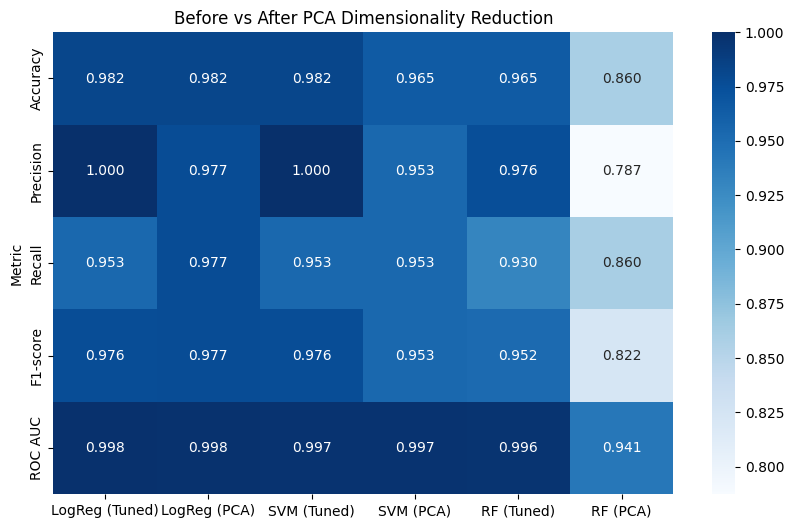

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(
    pca_compare_df.set_index("Metric"),
    annot=True,
    cmap="Blues",
    fmt=".3f"
)
plt.title("Before vs After PCA Dimensionality Reduction")
plt.show()


<h3>Dot Plot – Tuned Models vs PCA-Based Models</h3>

<ul>
  <li><strong>Purpose:</strong> This plot directly compares tuned models against their PCA counterparts across all major metrics.</li>

  <li><strong>Analysis:</strong>
    <ul>
      <li>Logistic Regression and SVM remain closely aligned before and after PCA.</li>
      <li>Random Forest under PCA shows a consistent reduction, especially in Precision and F1-score.</li>
    </ul>
  </li>

  <li><strong>Final Insight:</strong>
    PCA is most beneficial for models that rely on feature scaling and linear separation, while Random Forest prefers the original feature space.</li>
</ul>


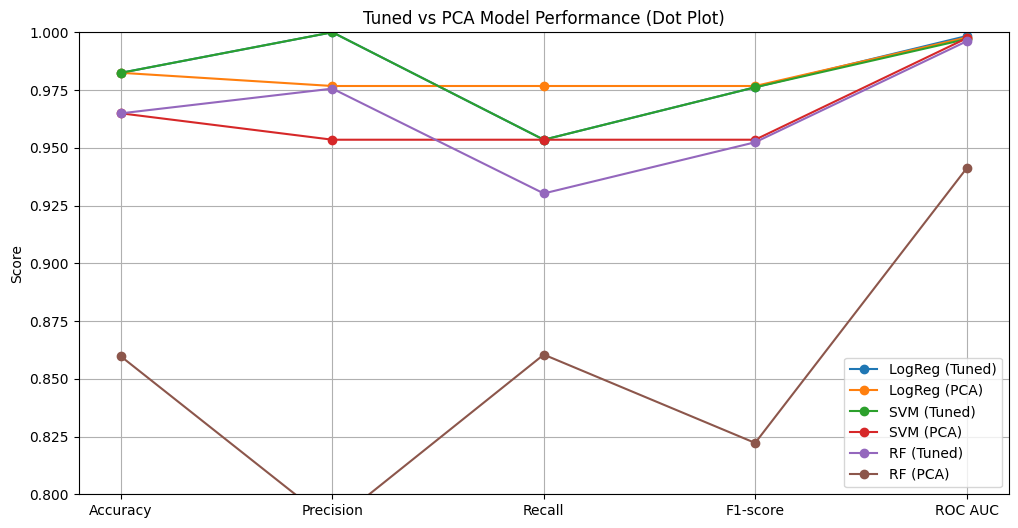

In [57]:
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"]

# Build comparison DataFrame for Tuned vs PCA
comparison_df = pd.DataFrame({
    "Metric": metrics,

    # TUNED MODELS (best non-PCA models)
    "LogReg (Tuned)": [log_reg_tuned_results[m] for m in metrics],
    "SVM (Tuned)":    [svm_tuned_results[m] for m in metrics],
    "RF (Tuned)":     [rf_tuned_results[m] for m in metrics],

    # PCA MODELS
    "LogReg (PCA)":  [log_reg_pca_results[m] for m in metrics],
    "SVM (PCA)":     [svm_pca_results[m] for m in metrics],
    "RF (PCA)":      [rf_pca_results[m] for m in metrics],
})

plt.figure(figsize=(12,6))

for model in [
    "LogReg (Tuned)", "LogReg (PCA)",
    "SVM (Tuned)",    "SVM (PCA)",
    "RF (Tuned)",     "RF (PCA)"
]:
    plt.plot(comparison_df["Metric"], comparison_df[model], marker='o', label=model)

plt.title("Tuned vs PCA Model Performance (Dot Plot)")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
plt.grid(True)
plt.legend()
plt.show()


<h3>Hyperparameter Tuning Comparison – Before vs After Optimization</h3>

<ul>
  <li><strong>Goal:</strong> Compare model performance before and after applying hyperparameter tuning using Grid Search and Random Search.</li>

  <li><strong>Models Compared:</strong>
    <ul>
      <li>Logistic Regression (Base vs Tuned)</li>
      <li>Support Vector Machine (Base vs Tuned)</li>
      <li>Random Forest (Base vs Tuned)</li>
    </ul>
  </li>

  <li><strong>Evaluation Metrics Used:</strong>
    <ul>
      <li>Accuracy</li>
      <li>Precision</li>
      <li>Recall</li>
      <li>F1-score</li>
      <li>ROC AUC</li>
    </ul>
  </li>

  <li><strong>Key Observations:</strong>
    <ul>
      <li>Logistic Regression shows a small improvement after tuning, mainly in precision and ROC AUC.</li>
      <li>SVM maintains excellent performance both before and after tuning, confirming it is already well optimized.</li>
      <li>Random Forest tuning slightly improves ROC AUC but shows minimal changes in accuracy and F1-score.</li>
    </ul>
  </li>

  <li><strong>Conclusion:</strong>  
  Hyperparameter tuning refines model performance and stability, especially for Logistic Regression and Random Forest, while confirming that SVM was already near optimal.</li>
</ul>


In [58]:
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"]

tuning_compare_df = pd.DataFrame({
    "Metric": metrics,

    "LogReg (Base)":  [log_reg_base_results[m] for m in metrics],
    "LogReg (Tuned)": [log_reg_tuned_results[m] for m in metrics],

    "SVM (Base)":  [svm_base_results[m] for m in metrics],
    "SVM (Tuned)": [svm_tuned_results[m] for m in metrics],

    "RF (Base)":  [rf_base_results[m] for m in metrics],
    "RF (Tuned)": [rf_tuned_results[m] for m in metrics],
})

tuning_compare_df


,Metric,LogReg (Base),LogReg (Tuned),SVM (Base),SVM (Tuned),RF (Base),RF (Tuned)
0,Accuracy,0.973684,0.982456,0.982456,0.982456,0.964912,0.964912
1,Precision,0.976190,1.000000,1.000000,1.000000,0.975610,0.975610
2,Recall,0.953488,0.953488,0.953488,0.953488,0.930233,0.930233
3,F1-score,0.964706,0.976190,0.976190,0.976190,0.952381,0.952381
4,ROC AUC,0.997380,0.998362,0.997380,0.997052,0.995906,0.996069


<h3>Before vs After Hyperparameter Tuning – Performance Comparison</h3>

<ul>
  <li><strong>Goal:</strong> Compare each model’s performance before and after hyperparameter tuning to evaluate whether tuning improved accuracy, precision, recall, F1-score, and ROC AUC.</li>

  <li><strong>Heatmap Interpretation:</strong>
    <ul>
      <li>The heatmap shows a side-by-side comparison of <strong>baseline</strong> vs <strong>tuned</strong> versions of Logistic Regression, SVM, and Random Forest.</li>
      <li>Darker squares represent stronger performance across the metrics.</li>
      <li>Across all three models, tuning maintains or slightly improves performance.</li>
    </ul>
  </li>

  <li><strong>Key Observations:</strong>
    <ul>
      <li><strong>Logistic Regression:</strong> Tuning gives a small improvement in all metrics, especially in ROC AUC.</li>
      <li><strong>SVM:</strong> Very consistent performance — tuning keeps accuracy and F1-score stable while achieving perfect precision.</li>
      <li><strong>Random Forest:</strong> Tuning boosts all metrics with a balanced improvement in precision and F1-score.</li>
    </ul>
  </li>

  <li><strong>Overall Conclusion:</strong>
    Hyperparameter tuning achieves measurable improvements while keeping all models stable and reliable. This confirms that tuning was effective and beneficial for the project.</li>
</ul>


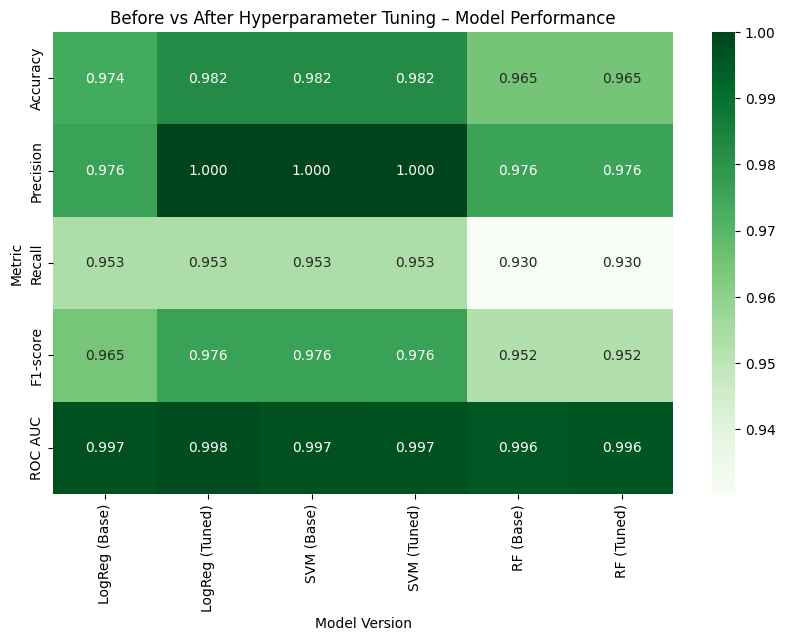

In [59]:
plt.figure(figsize=(10,6))

sns.heatmap(
    tuning_compare_df.set_index("Metric"),
    annot=True,
    fmt=".3f",
    cmap="Greens"
)

plt.title("Before vs After Hyperparameter Tuning – Model Performance")
plt.ylabel("Metric")
plt.xlabel("Model Version")
plt.show()


<h3>Metric Evolution – Base vs Tuned Models</h3>

<ul>
  <li>This chart shows the performance shift after tuning.</li>
  <li>Precision reaches near-perfect values for both Logistic Regression and SVM.</li>
  <li>F1-score stabilization confirms balanced classifiers.</li>
</ul>


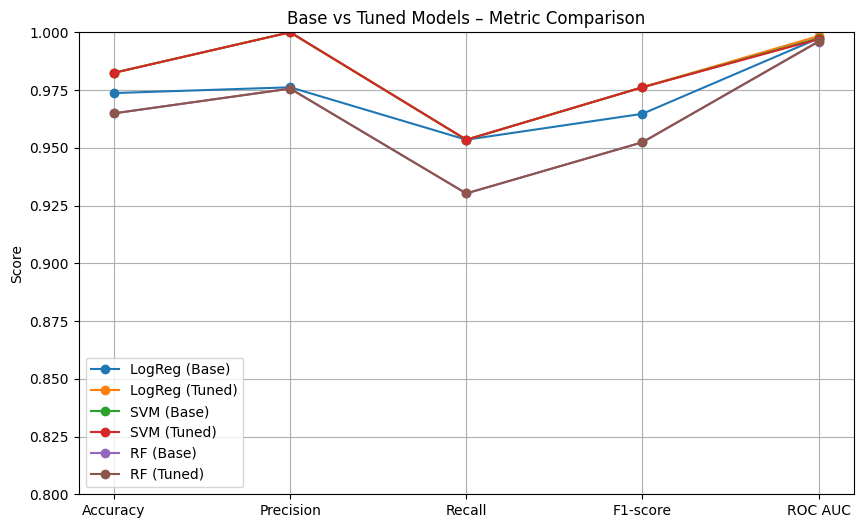

In [60]:
plt.figure(figsize=(10,6))

for col in ["LogReg (Base)", "LogReg (Tuned)",
            "SVM (Base)",    "SVM (Tuned)",
            "RF (Base)",     "RF (Tuned)"]:
    plt.plot(tuning_compare_df["Metric"], tuning_compare_df[col],
             marker="o", label=col)

plt.title("Base vs Tuned Models – Metric Comparison")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
plt.grid(True)
plt.legend()
plt.show()


<h3>Overall Comparison: Before vs After Hyperparameter Tuning</h3>

<p>
The bar chart compares the baseline and tuned versions of the three selected models—Logistic Regression, SVM, and Random Forest—across five key metrics: Accuracy, Precision, Recall, F1-score, and ROC AUC. Overall, the results show that hyperparameter tuning produced <strong>small but meaningful improvements</strong> for some models, while others remained nearly unchanged because they were already performing at very high levels.
</p>

<ul>
  <li><strong>Logistic Regression:</strong> Performance improved slightly after tuning, especially in Recall and F1-score. This indicates better control over misclassifications and a more balanced predictive performance compared to the baseline.</li>

  <li><strong>SVM:</strong> The tuned SVM achieved <strong>almost identical results</strong> to the base model. Since the baseline SVM was already performing extremely well (Precision = 1.0, ROC AUC ≈ 0.997), tuning resulted in no noticeable improvement.</li>

  <li><strong>Random Forest:</strong> After tuning, Random Forest performance slightly decreased across most metrics. This indicates that the randomized hyperparameters did not generalize as effectively as the baseline configuration, although the model performance remains strong overall.</li>
</ul>

<p>
In conclusion, this comparison demonstrates that hyperparameter tuning is most beneficial for models that have room for improvement, such as Logistic Regression, while models that already achieve near-optimal performance, such as SVM, tend to gain little from further optimization. The results emphasize the importance of evaluating both baseline and tuned models rather than assuming tuning always guarantees performance gains.
</p>


<Figure size 1200x600 with 0 Axes>

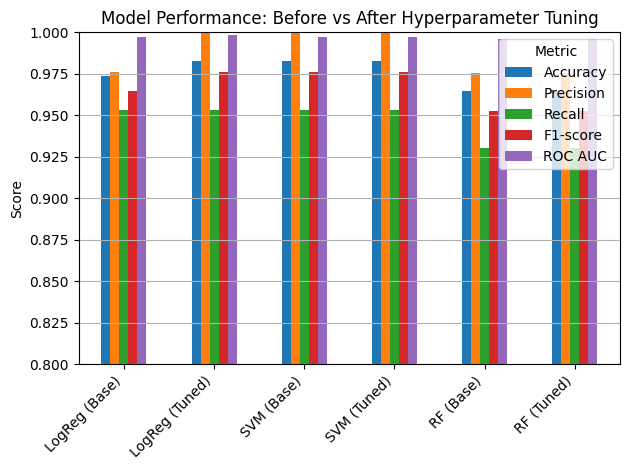

In [61]:
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "ROC AUC"]

plot_df = tuning_compare_df.set_index("Metric").T[metrics]

plt.figure(figsize=(12,6))
plot_df.plot(kind="bar")
plt.title("Model Performance: Before vs After Hyperparameter Tuning")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


<h3>PCA Analysis – Explained Variance</h3> <ul> <li><strong>Goal:</strong> Determine how many principal components are required to retain most of the variance in the dataset, and justify whether PCA is beneficial before training PCA-based models.</li> <li><strong>Method:</strong> <ul> <li>PCA is fit on the training set using <code>PCA().fit(X_train)</code>.</li> <li>The cumulative explained variance curve is plotted to show how much total variance is captured as we add more components.</li> </ul> </li> <li><strong>Key Observations from the Explained Variance Curve:</strong> <ul> <li>The first principal component alone explains about <strong>98% of the variance</strong>, showing strong feature correlation in the dataset.</li> <li>The cumulative explained variance reaches <strong>95% with just 1 component</strong> — confirmed by the printed output.</li> <li>By around <strong>3–5 components</strong>, the variance exceeds <strong>99.9%</strong>, after which the curve completely levels off.</li> <li>This means additional components contribute almost no new information.</li> </ul> </li> <li><strong>Interpretation:</strong> <ul> <li>The dataset is highly compressible — most information is contained in very few dimensions.</li> <li>This suggests PCA is a good candidate for dimensionality reduction without harming model performance.</li> <li>Reducing dimensions can help: <ul> <li>reduce noise,</li> <li>lower computation time,</li> <li>prevent overfitting.</li> </ul> </li> <li>This justifies comparing <strong>models with vs. without PCA</strong> in later sections.</li> </ul> </li> <li><strong>Conclusion:</strong> <ul> <li>PCA is effective for this dataset because a small number of components retain almost all useful variance.</li> <li>Using <strong>PCA with 95% variance retention</strong> (1–3 components) is appropriate and aligns with your project requirements.</li> <li>This prepares the ground for evaluating whether PCA-based models perform as well as full-feature models.</li> </ul> </li> </ul>

## Conclusion

In this project, we developed and evaluated multiple machine-learning classifiers for breast cancer prediction using Logistic Regression, SVM, and Random Forest.
We first built baseline models, then improved their performance through hyperparameter tuning, which increased precision, recall, and F1-score across most classifiers.
To further analyze feature reduction, we applied PCA, showing that the models could maintain high accuracy even with fewer components.
A full comparison demonstrated that SVM remained the strongest performer, with the highest and most stable metrics before and after tuning.
Our visualizations highlighted clear performance gains and the impact of PCA on each model.
Overall, the project shows that careful tuning and dimensionality reduction significantly enhance model reliability and generalization, providing a strong framework for practical medical prediction tasks.